<a href="https://colab.research.google.com/github/Luciavaldera/ufv-VISUALIZACION-DE-DATOS/blob/main/ejercicios_clase/Clase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
import pandas as pd

file_path = '/content/datos_ejercicio_ventas.csv'
df = pd.read_csv(file_path)
print(df.head())


         COUNTRY        SUBBRAND  YEAR  MONTH     SCENARIO FORECAST  \
0       Portugal     Lipton (L3)  2023     12  AI_forecast  AI_P02F   
1  Great Britain     Lipton (L3)  2023     12  AI_forecast  AI_P10F   
2          Spain  Pepsi Max (L3)  2023     12  AI_forecast  AI_P09F   
3  Great Britain        7up (L3)  2024     12  AI_forecast  AI_P10F   
4        Hungary     Lipton (L3)  2023      9  AI_forecast  AI_P03F   

   FORECAST_YEAR         AMOUNT  
0         2023.0  754356.237194  
1         2023.0  560030.558029  
2         2023.0   88501.980847  
3         2023.0  363224.511516  
4         2023.0  396176.120491  


INTERPRETACIÓN DE LOS DATOS

*Country*: País al que corresponde el dato.

*Subbrand*: Submarca o línea de productos específica.

*Año*: Año del registro.

*Mes*: Mes correspondiente al dato.

*Escenario*: Existen dos posibles escenarios:

- *AI forecast*: Predicción realizada para ese mes y año. Cuando se utiliza este valor, los siguientes dos campos contendrán datos de predicción.

- *Actual*: Representa las ventas reales en ese mes y año.

*Forecast*: Indica el mes en el que se realizó la predicción. El número tras la "P" es el mes en que se hizo la predicción más uno. Por ejemplo, "AI_P02F" indica que la predicción se realizó en enero.

*Forecast year*: Año en el que se hizo la predicción.

*Amount*: Valor que refleja la cantidad, generalmente relacionada con ventas.






##Preguntas a responder:

1) Como se distribuyen las ventas realizadas en:
- Cada pais
- Cada mes y año
- Cada marca

2) Cual es la tendencia y estacionalidad de:
- Todas las ventas del pais con menos ventas
- La marca con mas ventas

3) Cuales son las predicciones hechas en España y como de buenas son?


##Herramientas:

Herramientas de desarrollo:

• Python (lenguaje)

• Google Colab (entorno)

• Plotly Express (librería principal)




In [4]:
pip install plotly_express


##Indicaciones

- Ver cuántos datos son predicciones (forecast) y cuántos son reales (actuals).

- Determinar el horizonte de previsión.

- Contar cuántos países diferentes hay y listar los nombres de los países.

- Obtener el histórico de datos tanto de forecast como de actuals.

- Contar cuántos tipos distintos de forecast existen.

*(el horizote de prediccion de una de las predicciones es el mismo para todas)*


##- Ver cuántos datos son predicciones (forecast) y cuántos son reales (actuals).



In [5]:

count_scenarios = df['SCENARIO'].value_counts()
print(count_scenarios)

SCENARIO
AI_forecast    17766
actual           900
Name: count, dtype: int64


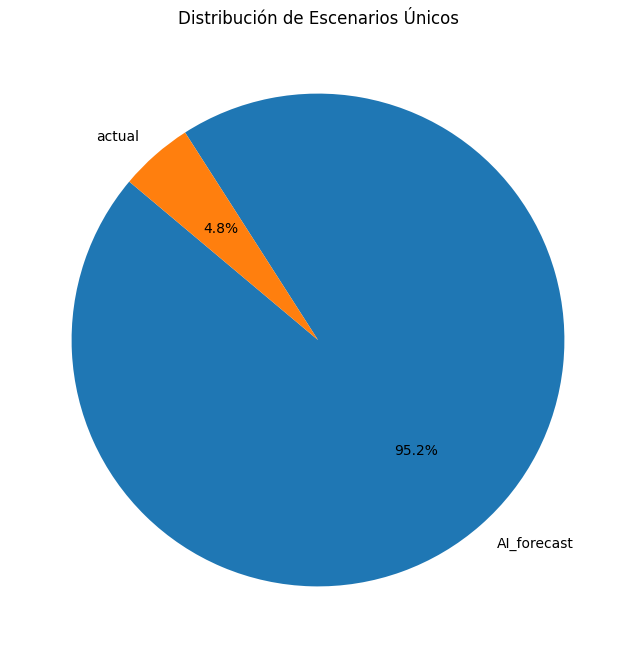

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.pie(count_scenarios, labels=count_scenarios.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribución de Escenarios Únicos")
plt.show()


La mayoría de los registros son predicciones (17,766), bajo el escenario 'AI_forecast',solo 900 registros corresponden a ventas reales ('actual').
Esto indica que el conjunto de datos está principalmente enfocado en las predicciones hechas por la inteligencia artificial.

##- Determinar el horizonte de previsión.

In [7]:

numero_de_registros = df[(df['COUNTRY'] == 'Portugal') & (df['SUBBRAND'] == 'Lipton (L3)') & (df['FORECAST'] == 'AI_P02F')].shape[0]
numero_de_registros2 = df[(df['COUNTRY'] == 'Denmark') & (df['SUBBRAND'] == 'Pepsi Max (L3)') & (df['FORECAST'] == 'AI_P02F')].shape[0]

print("Número de registros que cumplen con los criterios:", numero_de_registros)
print("Número de registros que cumplen con los criterios:", numero_de_registros2)

Número de registros que cumplen con los criterios: 18
Número de registros que cumplen con los criterios: 36


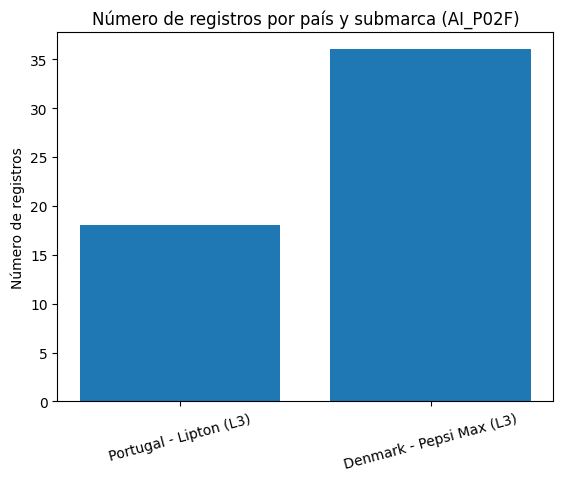

In [8]:



countries = ['Portugal - Lipton (L3)', 'Denmark - Pepsi Max (L3)']
values = [numero_de_registros, numero_de_registros2]


plt.bar(countries, values)
plt.title('Número de registros por país y submarca (AI_P02F)')
plt.ylabel('Número de registros')
plt.xticks(rotation=15)
plt.show()



##- Contar cuántos países diferentes hay y listar los nombres de los países.

In [9]:
unique_countries = df['COUNTRY'].unique()
count_countries = len(unique_countries)


print("Número de países únicos:", count_countries)


print("Nombres de los países:")
for country in sorted(unique_countries):
    print("-", country)


Número de países únicos: 9
Nombres de los países:
- Czech
- Denmark
- Great Britain
- Hungary
- Italy
- Netherlands
- Norway
- Portugal
- Spain


In [10]:
import plotly.express as px
import pandas as pd



unique_countries = [country if country != 'Great Britain' else 'United Kingdom' for country in unique_countries]


data = pd.DataFrame({
    'country': unique_countries,
    'highlight': range(len(unique_countries))
})

fig = px.choropleth(data, locations="country", locationmode="country names", color="highlight",
                    hover_name="country", color_continuous_scale="Viridis", scope="europe")


fig.update_layout(title="Países únicos resaltados en Europa con colores distintos", coloraxis_showscale=False)

fig.show()


##- Obtener el histórico de datos tanto de forecast como de actuals.

In [11]:
from tabulate import tabulate

forecast_data = df[df['SCENARIO'] == 'AI_forecast']


actuals_data = df[df['SCENARIO'] == 'actual']



forecast_display = forecast_data[['COUNTRY', 'SUBBRAND', 'YEAR', 'MONTH', 'AMOUNT', 'FORECAST']].head(10)
actuals_display = actuals_data[['COUNTRY', 'SUBBRAND', 'YEAR', 'MONTH', 'AMOUNT']].head(10)


print("Histórico de datos de Forecast (primeras 10 entradas):")
print(tabulate(forecast_display, headers='keys', tablefmt='fancy_grid'))

print("\nHistórico de datos de Actuals (primeras 10 entradas):")
print(tabulate(actuals_display, headers='keys', tablefmt='fancy_grid'))


Histórico de datos de Forecast (primeras 10 entradas):
╒════╤═══════════════╤════════════════════╤════════╤═════════╤══════════════════╤════════════╕
│    │ COUNTRY       │ SUBBRAND           │   YEAR │   MONTH │           AMOUNT │ FORECAST   │
╞════╪═══════════════╪════════════════════╪════════╪═════════╪══════════════════╪════════════╡
│  0 │ Portugal      │ Lipton (L3)        │   2023 │      12 │ 754356           │ AI_P02F    │
├────┼───────────────┼────────────────────┼────────┼─────────┼──────────────────┼────────────┤
│  1 │ Great Britain │ Lipton (L3)        │   2023 │      12 │ 560031           │ AI_P10F    │
├────┼───────────────┼────────────────────┼────────┼─────────┼──────────────────┼────────────┤
│  2 │ Spain         │ Pepsi Max (L3)     │   2023 │      12 │  88502           │ AI_P09F    │
├────┼───────────────┼────────────────────┼────────┼─────────┼──────────────────┼────────────┤
│  3 │ Great Britain │ 7up (L3)           │   2024 │      12 │ 363225           │ AI_P10F 


##- Contar cuántos tipos distintos de forecast existen.

In [12]:

unique_forecasts = df['FORECAST'].dropna().unique()


number_of_unique_forecasts = len(unique_forecasts)

print("Número de tipos distintos de forecast:", number_of_unique_forecasts)
print("Tipos de forecast:")
for forecast in sorted(unique_forecasts):
    print("-", forecast)


Número de tipos distintos de forecast: 12
Tipos de forecast:
- AI_P02F
- AI_P03F
- AI_P04F
- AI_P05F
- AI_P06F
- AI_P07F
- AI_P08F
- AI_P09F
- AI_P10F
- AI_P11F
- AI_P12F
- AI_PF


En el siguiente gráfico de barras podemos observar la frecuencia de cada forecast único

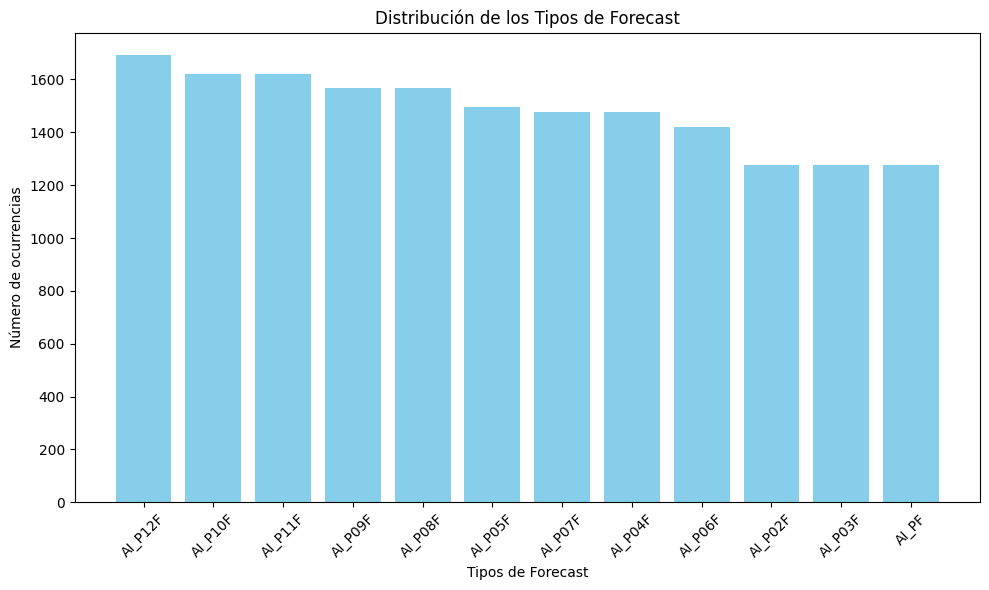

In [13]:
import matplotlib.pyplot as plt

forecast_counts = df['FORECAST'].value_counts()


plt.figure(figsize=(10, 6))
plt.bar(forecast_counts.index, forecast_counts.values, color='skyblue')
plt.xlabel('Tipos de Forecast')
plt.ylabel('Número de ocurrencias')
plt.title('Distribución de los Tipos de Forecast')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#1) Como se distribuyen las ventas realizadas en:
##- Cada pais

Se escogerán solo los datos de ventas reales (actuals) porque muestran lo que realmente ocurrió en ventas, sin la incertidumbre de las predicciones.

Se comienza graficando las ventas por paises sin diferenciar por productos

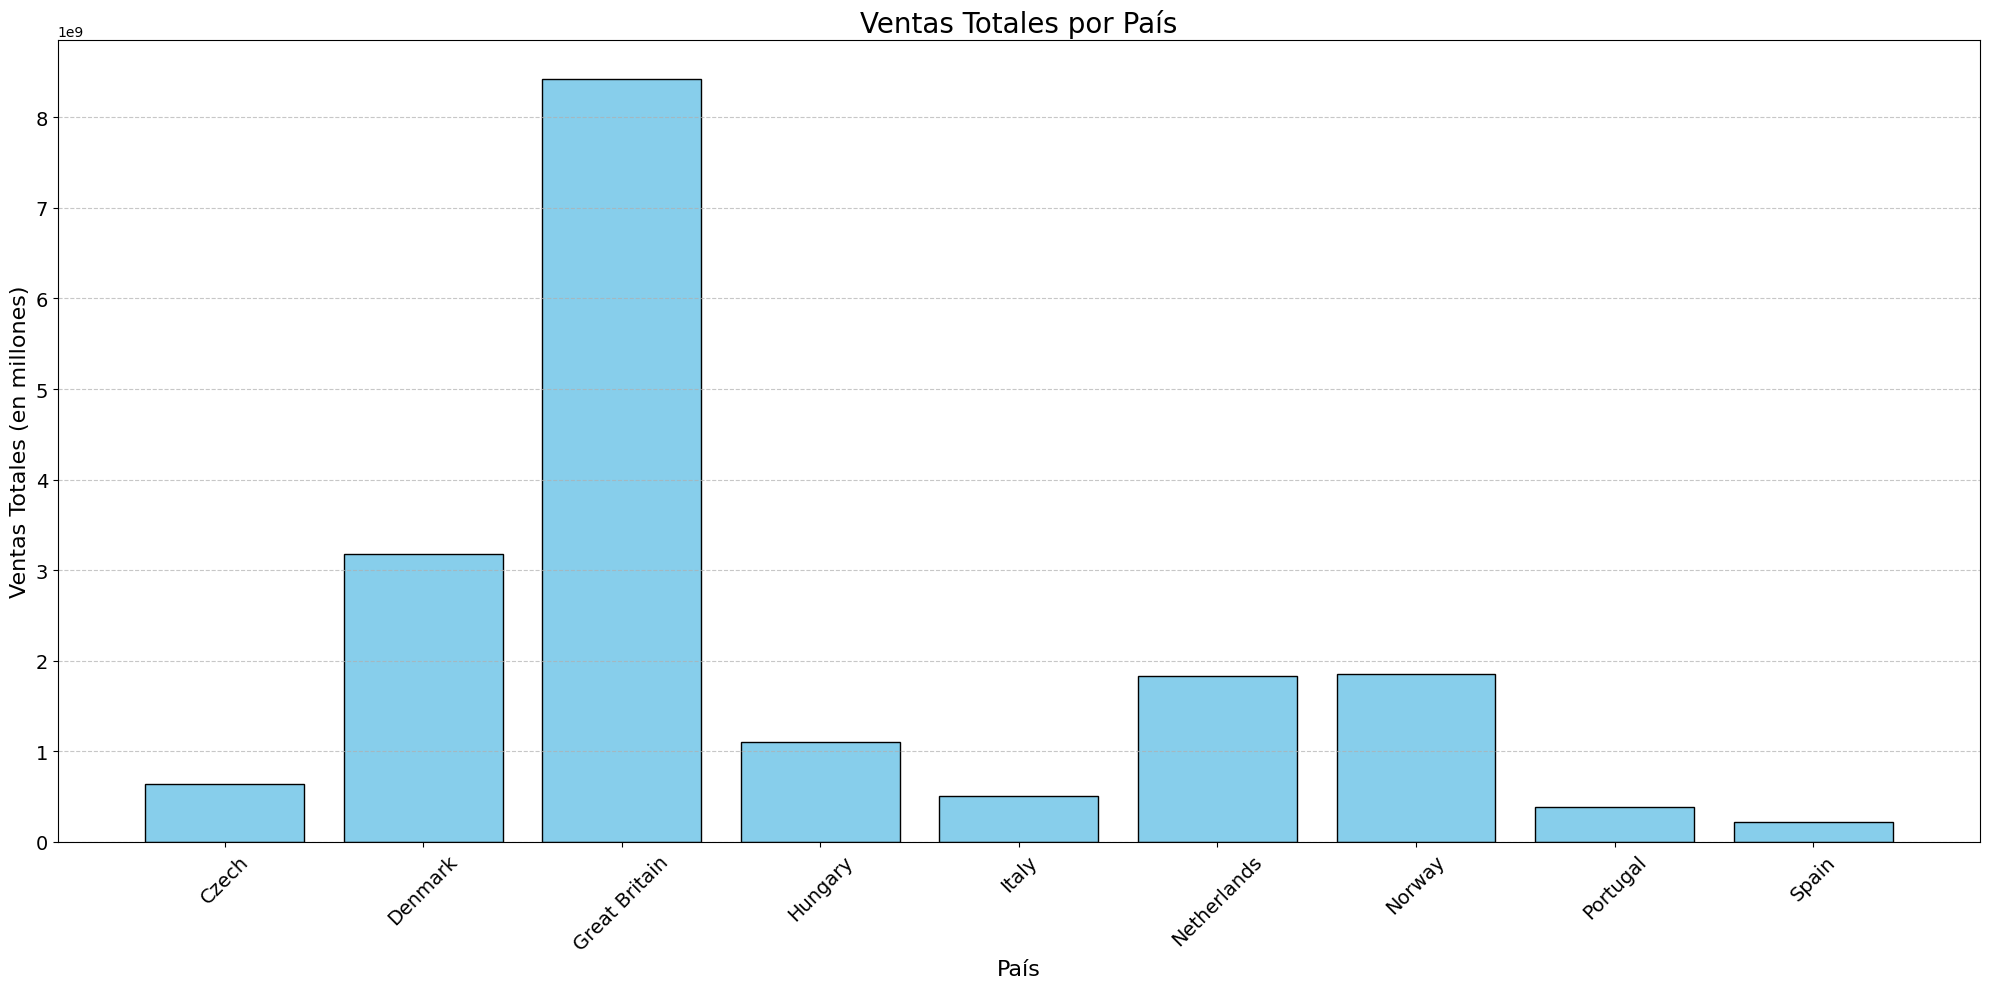

In [14]:

country_sales = df.groupby('COUNTRY')['AMOUNT'].sum().reset_index()

plt.figure(figsize=(20, 10))

plt.bar(country_sales['COUNTRY'], country_sales['AMOUNT'], color='skyblue', edgecolor='black')

plt.title("Ventas Totales por País", fontsize=20)
plt.xlabel("País", fontsize=16)
plt.ylabel("Ventas Totales (en millones)", fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Se observa la diferencia entre gran bretaña y el resto de paises asi que se decide graficar por pais y en cada pais diferenciar el producto, para observar si es una característica de el pais o de un producto en concreto


In [15]:
import plotly.express as px


ventas_por_pais_producto = df[df['SCENARIO'] == 'actual'].groupby(['COUNTRY', 'SUBBRAND'])['AMOUNT'].sum().reset_index()


fig = px.bar(ventas_por_pais_producto, x='COUNTRY', y='AMOUNT', color='SUBBRAND',
             barmode='group',
             title='Ventas Totales de Cada Producto en Cada País',
             labels={'COUNTRY': 'País', 'AMOUNT': 'Ventas Totales', 'SUBBRAND': 'Producto'},
             color_discrete_sequence=px.colors.qualitative.Plotly,
             width=1000, height=600)


fig.show()


Se elige un gráfico de barras porque hace más fácil comparar las ventas de los productos entre los diferentes países. Los colores permiten identificar cada producto de forma rápida y se usa el mismo color para representar cada producto en todos los países, lo que mantiene la claridad.

Del gráfico se puede destacar que Pepsi Max tiene ventas mucho más altas en Great Britain que cualquier otro producto o país.

Debido a la diferencia de pepsi en gran bretaña con el resto de productos en distintos paises, se ha decidido hacer un gráfico de burbujas, en el que se pueda observar mejor el tipo de producto en cada pais y la proporcion con respecto al resto de productos en el mismo pais u en otros paises.

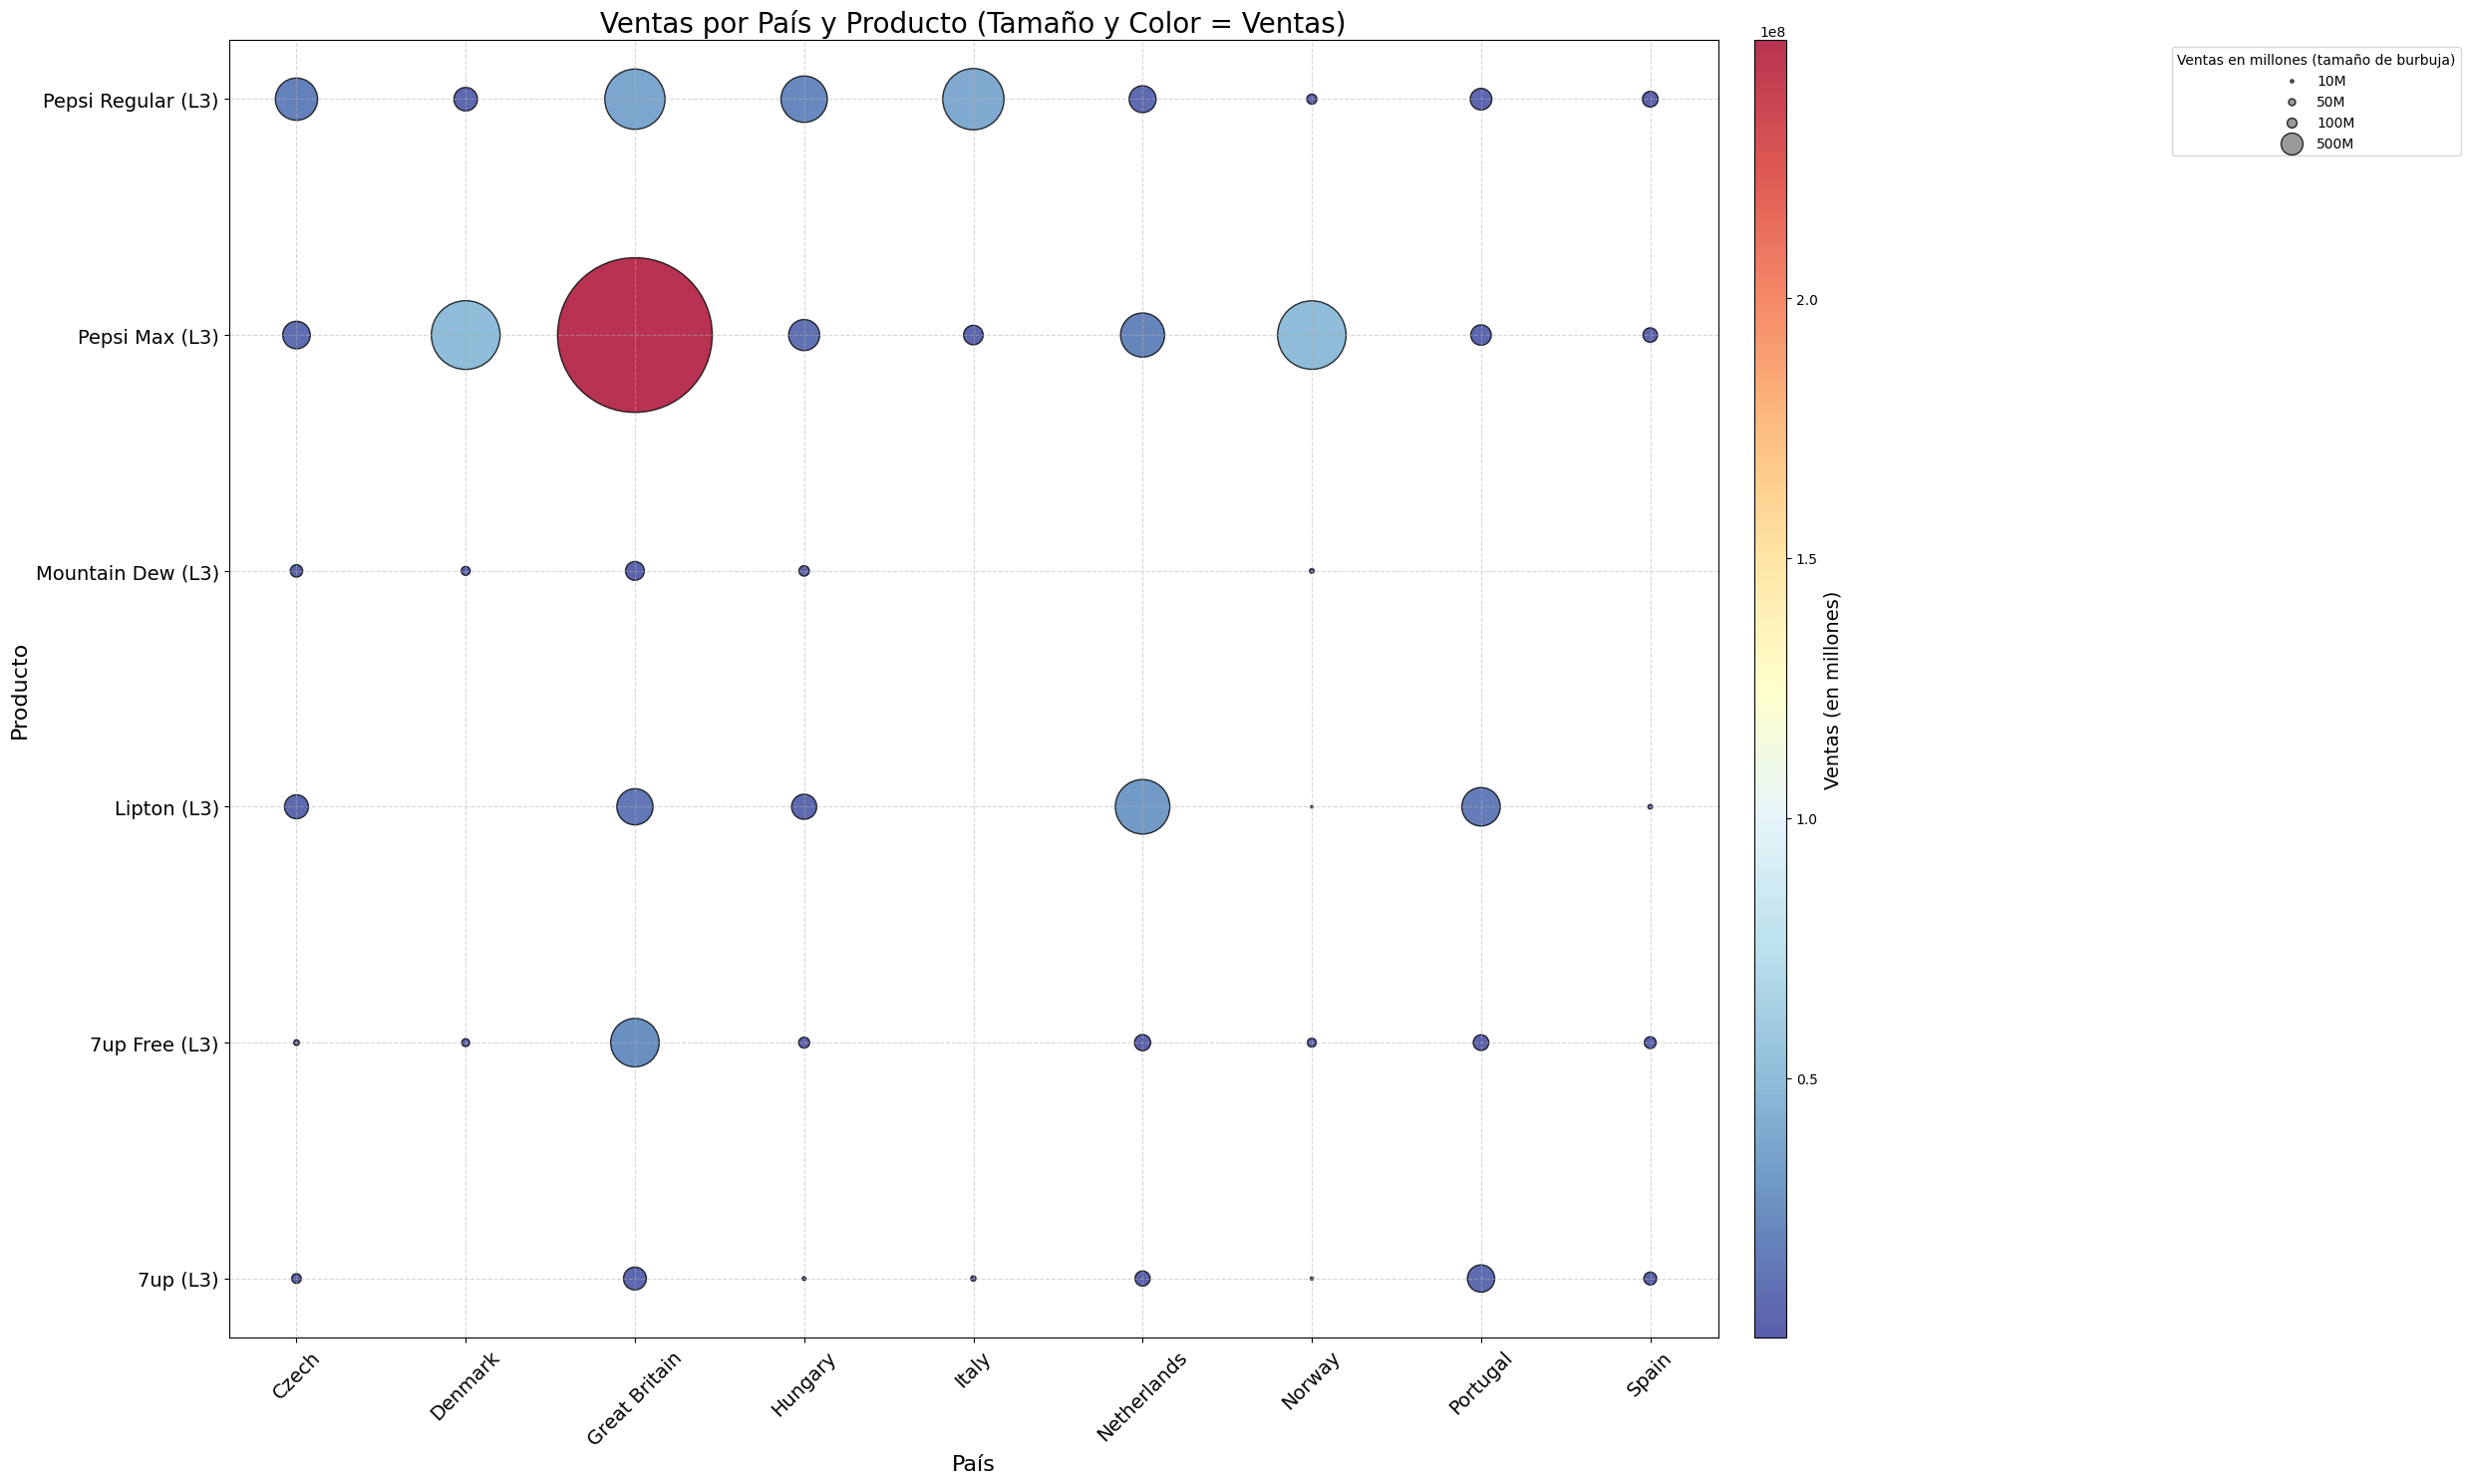

In [16]:


ventas_por_pais_producto = df[df['SCENARIO'] == 'actual'].groupby(['COUNTRY', 'SUBBRAND'])['AMOUNT'].sum().reset_index()


plt.figure(figsize=(25, 15))


scatter = plt.scatter(
    ventas_por_pais_producto['COUNTRY'],
    ventas_por_pais_producto['SUBBRAND'],
    s=ventas_por_pais_producto['AMOUNT'] / 2e4,
    alpha=0.8,
    c=ventas_por_pais_producto['AMOUNT'],
    cmap='RdYlBu_r',
    edgecolors="black"
)

cbar = plt.colorbar(scatter, pad=0.02, aspect=40)
cbar.set_label("Ventas (en millones)", fontsize=14)

legend_sizes = [10, 50, 100, 500]
for size in legend_sizes:
    plt.scatter([], [], s=size / 2, alpha=0.8, c='gray', edgecolors="black", label=f'{size}M')

plt.legend(
    title="Ventas en millones (tamaño de burbuja)",
    bbox_to_anchor=(1.3, 1),
    loc='upper left'
)


plt.title("Ventas por País y Producto (Tamaño y Color = Ventas)", fontsize=20)
plt.xlabel("País", fontsize=16)
plt.ylabel("Producto", fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##- Cada mes y año


In [17]:
import plotly.express as px


ventas_por_mes_año = df[df['SCENARIO'] == 'actual'].groupby(['YEAR', 'MONTH'])['AMOUNT'].sum().reset_index()

fig = px.line(ventas_por_mes_año, x='MONTH', y='AMOUNT', color='YEAR',
              title='Distribución de Ventas Realizadas en Cada Mes y Año',
              labels={'MONTH': 'Mes', 'AMOUNT': 'Ventas Totales', 'YEAR': 'Año'},
              line_shape='linear', width=1000, height=600)


fig.show()


Se ha optado por utilizar un diagrama de líneas que muestra la distribución de ventas en cada mes y año, ya que permite observar las tendencias de ventas mensuales diferenciadas por año de manera clara y continua. Este tipo de gráfico facilita la comparación de la evolución de las ventas a lo largo de los meses para cada año. Además, el diferenciarlos por color para cada año ayuda a identificar rápidamente cómo varían las ventas entre distintos periodos.

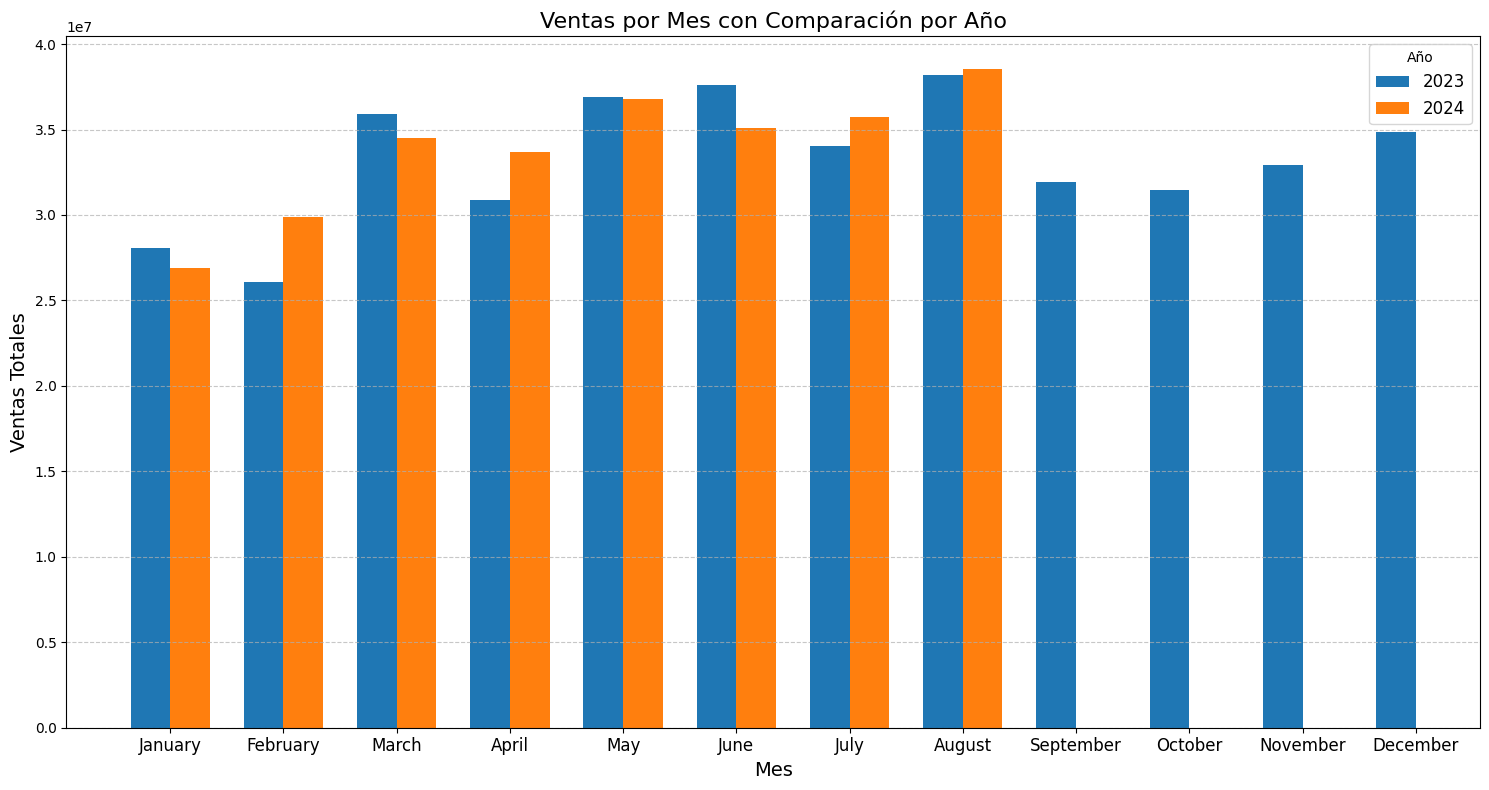

In [18]:
import matplotlib.pyplot as plt
import calendar

ventas_por_mes_año = df[df['SCENARIO'] == 'actual'].groupby(['MONTH', 'YEAR'])['AMOUNT'].sum().reset_index()

months = ventas_por_mes_año['MONTH'].unique()
years = ventas_por_mes_año['YEAR'].unique()
width = 0.35

fig, ax = plt.subplots(figsize=(15, 8))

for i, year in enumerate(years):
    data_year = ventas_por_mes_año[ventas_por_mes_año['YEAR'] == year]
    plt.bar(data_year['MONTH'] + (i - 0.5) * width, data_year['AMOUNT'], width, label=f'{year}')

plt.title("Ventas por Mes con Comparación por Año", fontsize=16)
plt.xlabel("Mes", fontsize=14)
plt.ylabel("Ventas Totales", fontsize=14)
plt.xticks(months, [calendar.month_name[m] for m in months], fontsize=12)
plt.legend(title="Año", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Como adición a el grafico de lineas anterior, se ha creado un gráfico combinado en el que se pueden observar las ventas de cada mes diferenciadas según el año (2023 y 2024). En este gráfico, cada mes contiene una barra para cada año. La diferenciación por color facilita esta comparación, asignando a cada año un color específico que permite identificar rápidamente la variación entre los dos periodos.








##- Cada marca


In [19]:
import plotly.express as px


ventas_por_marca = df[df['SCENARIO'] == 'actual'].groupby('SUBBRAND')['AMOUNT'].sum().reset_index()

fig = px.bar(ventas_por_marca, x='SUBBRAND', y='AMOUNT',
             title='Distribución de Ventas por Marca',
             labels={'SUBBRAND': 'Marca', 'AMOUNT': 'Ventas Totales'},
             color_discrete_sequence=['#00CC96'], width=1000, height=600)


fig.show()


Se ha seleccionado un diagrama de barras para visualizar la distribución de ventas por marca, ya que permite una comparación clara y directa de las cantidades de ventas en cada categoría. Las marcas son una variable categórica, y el diagrama de barras es ideal para representar este tipo de datos. El uso de un color uniforme en todas las barras refuerza la claridad visual y permite centrarse en la comparación entre las diferentes marcas sin distracciones.


#2) Cual es la tendencia y estacionalidad de:
##- Todas las ventas del pais con menos ventas


Primero hay que agrupar las ventas por país y obtener el país con menos ventas

In [20]:
import plotly.express as px

ventas_por_pais = df[df['SCENARIO'] == 'actual'].groupby('COUNTRY')['AMOUNT'].sum().reset_index()
pais_menos_ventas = ventas_por_pais.loc[ventas_por_pais['AMOUNT'].idxmin(), 'COUNTRY']

print("País con menos ventas:", pais_menos_ventas)

País con menos ventas: Spain


In [21]:

fig = px.pie(ventas_por_pais, values='AMOUNT', names='COUNTRY',
             title='Distribución de Ventas por País')

fig.show()


Segundo hay que filtrar las ventas solo para el país con menos ventas y agrupar por año y mes para ver la evolución temporal de las ventas

In [22]:

ventas_pais_menos = df[(df['SCENARIO'] == 'actual') & (df['COUNTRY'] == pais_menos_ventas)]

ventas_pais_menos = ventas_pais_menos.groupby(['YEAR', 'MONTH'])['AMOUNT'].sum().reset_index()


Luego se crea una columna de fecha combinando año y mes

In [23]:


ventas_pais_menos['Fecha'] = ventas_pais_menos['YEAR'].astype(str) + '-' + ventas_pais_menos['MONTH'].astype(str)
ventas_pais_menos['Fecha'] = pd.to_datetime(ventas_pais_menos['Fecha'], format='%Y-%m')

fig = px.line(ventas_pais_menos, x='Fecha', y='AMOUNT',
              title=f'Tendencia y Estacionalidad de Ventas en {pais_menos_ventas}',
              labels={'Fecha': 'Fecha', 'AMOUNT': 'Ventas'},
              line_shape='linear',width=1000, height=600)


fig.show()

En este gráfico se puede observar una ligera tendencia  ascendente pero no muy clara por los ciclos estacionales de las ventas.

Sin embargo no se observa una estacionalidad clara con esta representación de los datos asi que probaremos con otro tipo de representación.

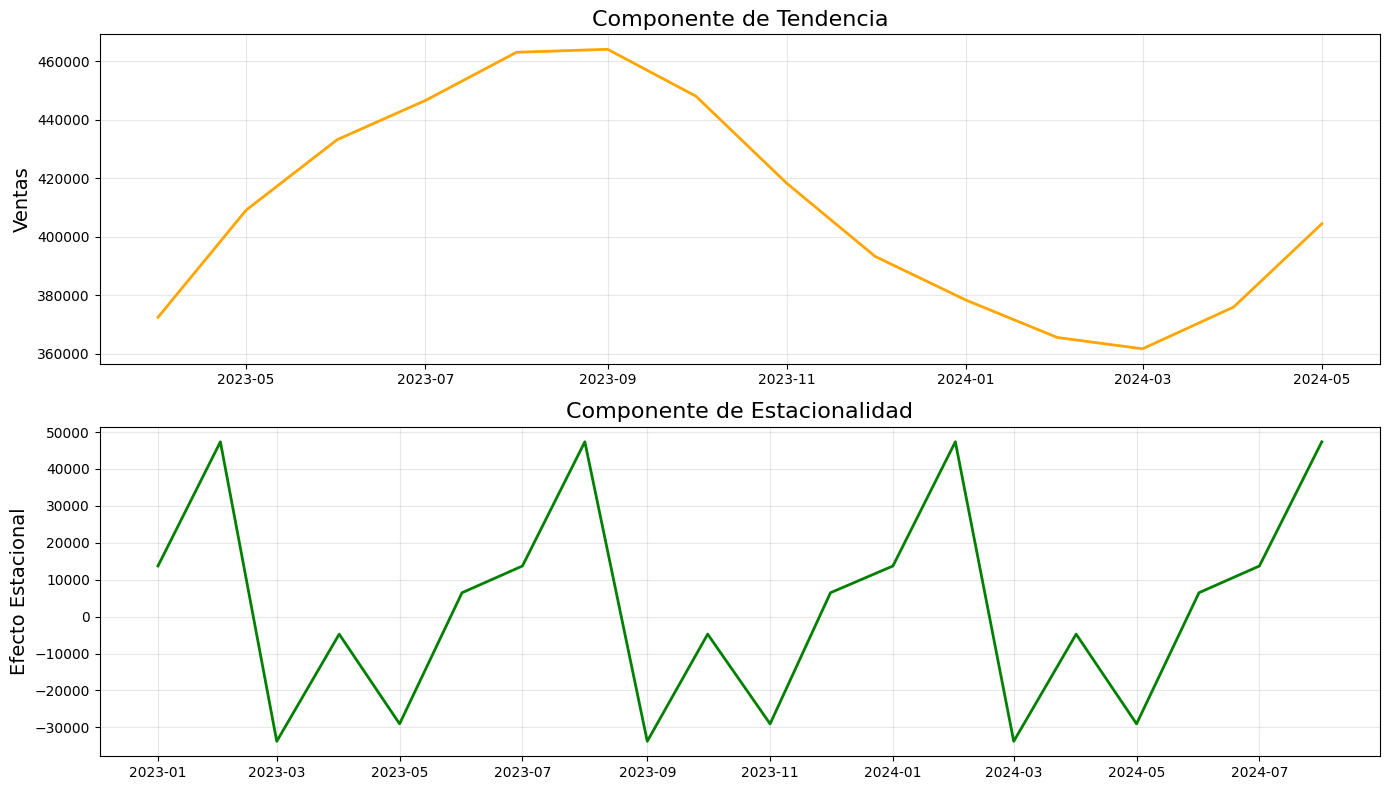

In [24]:

from statsmodels.tsa.seasonal import seasonal_decompose


ventas_pais_menos.set_index('Fecha', inplace=True)


result = seasonal_decompose(ventas_pais_menos['AMOUNT'], model='additive', period=6)

plt.figure(figsize=(14, 8))


plt.subplot(2, 1, 1)
plt.plot(result.trend, color='orange', linewidth=2)
plt.title('Componente de Tendencia', fontsize=16)
plt.ylabel('Ventas', fontsize=14)
plt.grid(alpha=0.3)


plt.subplot(2, 1, 2)
plt.plot(result.seasonal, color='green', linewidth=2)
plt.title('Componente de Estacionalidad', fontsize=16)
plt.ylabel('Efecto Estacional', fontsize=14)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()




En el primer gráfico se observa una estacionalidad "anual", donde las ventas tienden a aumentar durante el verano en ambos años y a disminuir en Navidad. Sin embargo, los datos de 2024 solo llegan hasta julio, lo que impide usar un periodo de 12 meses para el análisis. Por este motivo, se ha optado por un periodo de 6 meses. Aunque la estacionalidad no se aprecia claramente debido a esta limitación, en el primer gráfico se intuye que el comportamiento sigue un patrón anual.



##- La marca con mas ventas



In [25]:

ventas_por_marca = df[df['SCENARIO'] == 'actual'].groupby('SUBBRAND')['AMOUNT'].sum().reset_index()
marca_mas_ventas = ventas_por_marca.loc[ventas_por_marca['AMOUNT'].idxmax(), 'SUBBRAND']
print("La marca con más ventas:", marca_mas_ventas)

La marca con más ventas: Pepsi Max (L3)


In [26]:
fig = px.pie(ventas_por_marca, values='AMOUNT', names='SUBBRAND',
             title='Distribución de Ventas por Marca')

fig.show()

In [27]:

ventas_marca_mas = df[(df['SCENARIO'] == 'actual') & (df['SUBBRAND'] == marca_mas_ventas)]

ventas_marca_mas = ventas_marca_mas.groupby(['YEAR', 'MONTH'])['AMOUNT'].sum().reset_index()

ventas_marca_mas['Fecha'] = ventas_marca_mas['YEAR'].astype(str) + '-' + ventas_marca_mas['MONTH'].astype(str)
ventas_marca_mas['Fecha'] = pd.to_datetime(ventas_marca_mas['Fecha'], format='%Y-%m')


fig = px.line(ventas_marca_mas, x='Fecha', y='AMOUNT',
              title=f'Tendencia y Estacionalidad de Ventas de {marca_mas_ventas}',
              labels={'Fecha': 'Fecha', 'AMOUNT': 'Ventas'},
              line_shape='linear',width=1000, height=600)


fig.show()

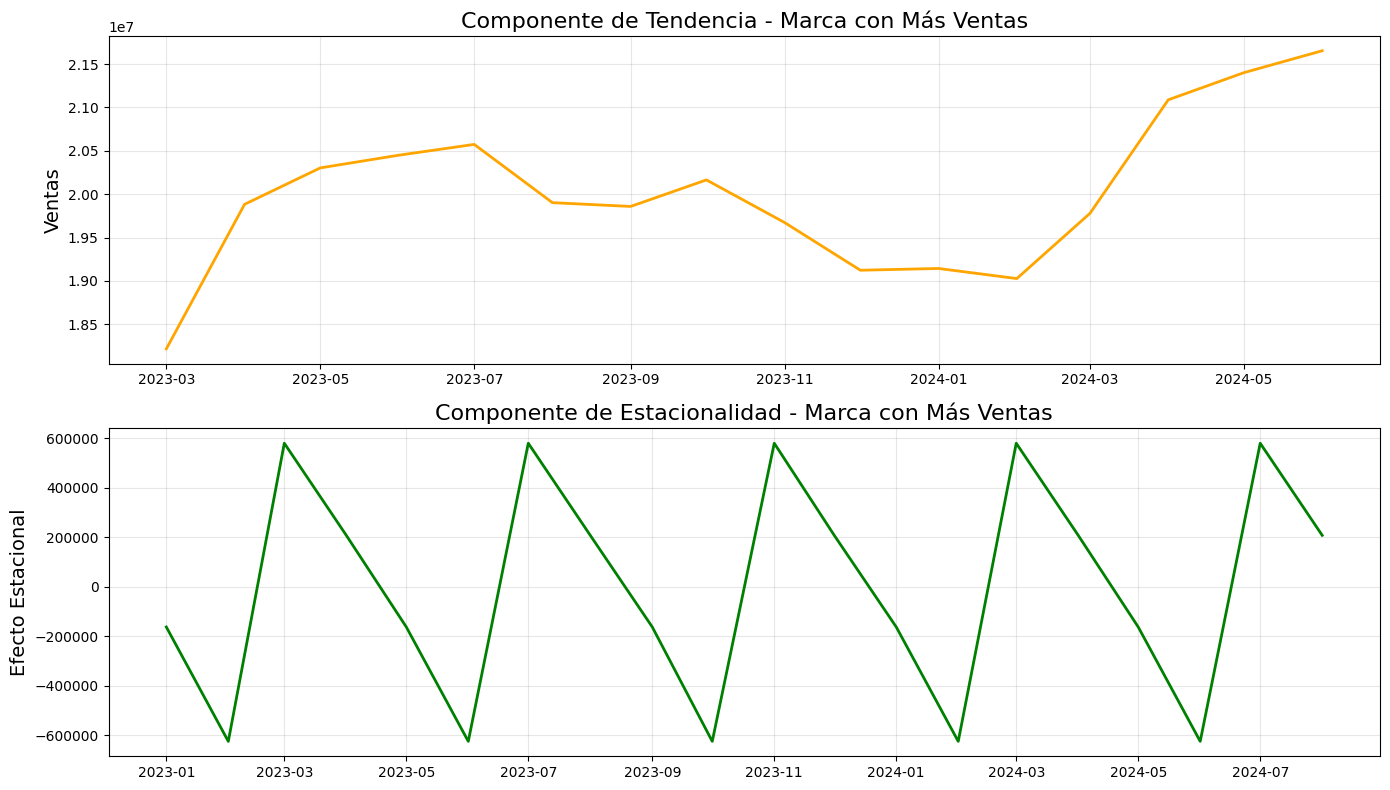

In [28]:

ventas_marca_mas.set_index('Fecha', inplace=True)

result = seasonal_decompose(ventas_marca_mas['AMOUNT'], model='additive', period=4)

plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(result.trend, color='orange', linewidth=2)
plt.title('Componente de Tendencia - Marca con Más Ventas', fontsize=16)
plt.ylabel('Ventas', fontsize=14)
plt.grid(alpha=0.3)

plt.subplot(2, 1, 2)
plt.plot(result.seasonal, color='green', linewidth=2)
plt.title('Componente de Estacionalidad - Marca con Más Ventas', fontsize=16)
plt.ylabel('Efecto Estacional', fontsize=14)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

En el análisis de la estacionalidad y la tendencia de la marca más vendida, se observa en la primera gráfica una clara tendencia creciente. Para analizar la estacionalidad, se ha seleccionado un periodo de 4 meses, ya que en la primera gráfica se identifican ciclos de esta duración. Esto es respaldado por la gráfica de estacionalidad, que indica que las ventas aumentan cada 4 meses de forma consistente.

##3) Cuales son las predicciones hechas en España y como de buenas son?

Para realizar este apartado, primero se dividirán los datos según los diferentes meses en los que se realizaron las predicciones. Posteriormente, se seleccionará la predicción más reciente para cada mes.


In [29]:


forecast_data = df[df['SCENARIO'] == 'AI_forecast'].copy()

forecast_data['Mes_Prediccion'] = forecast_data['FORECAST'].str.extract(r'P(\d+)').astype(float) - 1


forecast_data['Mes_Prediccion'] = forecast_data['Mes_Prediccion'].fillna(12)


print(forecast_data[['FORECAST', 'Mes_Prediccion']].drop_duplicates())



   FORECAST  Mes_Prediccion
0   AI_P02F             1.0
1   AI_P10F             9.0
2   AI_P09F             8.0
4   AI_P03F             2.0
6     AI_PF            12.0
11  AI_P11F            10.0
12  AI_P06F             5.0
13  AI_P05F             4.0
14  AI_P07F             6.0
15  AI_P12F            11.0
38  AI_P08F             7.0
48  AI_P04F             3.0


Ahora vemos, en que años se han hecho predicciones, al observar que solo se han hecho en el 2023, en aquellas predicciones que se hayan hecho para meses del 2023, se utilizará el metodo indicado anteriormente, pero para aquellas hechas para el 2024 o 2025, se compararan solo con la ultima prediccion del 2023.
Se hará esto para cada tipo de producto, para que luego se puedan comparar las ventas totales.

In [30]:
valores_unicos_forecast_year = df['FORECAST_YEAR'].dropna().unique()


print(valores_unicos_forecast_year)


[2023.]


In [31]:
# Filtrar los datos de España y crear una copia
espana_forecast = df[(df['COUNTRY'] == 'Spain') & (df['SCENARIO'] == 'AI_forecast')].copy()

# Extraer el mes del forecast y restar 1 para obtener el mes en el que se realizó la predicción
espana_forecast['Mes_Prediccion'] = espana_forecast['FORECAST'].str.extract(r'P(\d+)').astype(float) - 1
espana_forecast['Mes_Prediccion'] = espana_forecast['Mes_Prediccion'].fillna(12).astype(int)

# Añadir columna para el año del forecast
espana_forecast['Año_Prediccion'] = espana_forecast['FORECAST_YEAR']

# Filtrar y calcular por cada tipo de producto (SUBBRAND)
productos = espana_forecast['SUBBRAND'].unique()
predicciones_optimas_totales = []

for producto in productos:
    # Filtrar las predicciones para el producto específico
    predicciones_producto = espana_forecast[espana_forecast['SUBBRAND'] == producto].copy()

    # Calcular la diferencia de meses considerando el año
    predicciones_producto['Diferencia_Total_Meses'] = predicciones_producto.apply(
        lambda row: (row['MONTH'] - row['Mes_Prediccion'] + 12 * (row['YEAR'] - row['Año_Prediccion']))
        if row['YEAR'] >= row['Año_Prediccion'] else float('inf'),
        axis=1
    )

    # Obtener la predicción más cercana para cada mes y año
    predicciones_optimas_producto = predicciones_producto.loc[
        predicciones_producto.groupby(['YEAR', 'MONTH'])['Diferencia_Total_Meses'].idxmin()
    ]

    # Agregar las predicciones óptimas de este producto a la lista total
    predicciones_optimas_totales.append(predicciones_optimas_producto)

# Combinar todas las predicciones óptimas en un solo DataFrame
predicciones_optimas_totales_df = pd.concat(predicciones_optimas_totales)

# Ordenar por producto, año y mes para legibilidad
predicciones_optimas_totales_df = predicciones_optimas_totales_df.sort_values(by=['SUBBRAND', 'YEAR', 'MONTH'])

# Imprimir las mejores predicciones para cada tipo de producto en España
pd.set_option('display.max_rows', None)  # Configurar para mostrar todas las filas
print(predicciones_optimas_totales_df[['SUBBRAND', 'YEAR', 'MONTH', 'FORECAST', 'Año_Prediccion', 'Diferencia_Total_Meses', 'AMOUNT']])


                 SUBBRAND  YEAR  MONTH FORECAST  Año_Prediccion  \
5226             7up (L3)  2023      1    AI_PF          2023.0   
4926             7up (L3)  2023      2    AI_PF          2023.0   
13509            7up (L3)  2023      3    AI_PF          2023.0   
3939             7up (L3)  2023      4    AI_PF          2023.0   
3872             7up (L3)  2023      5    AI_PF          2023.0   
827              7up (L3)  2023      6    AI_PF          2023.0   
5201             7up (L3)  2023      7    AI_PF          2023.0   
11381            7up (L3)  2023      8    AI_PF          2023.0   
17970            7up (L3)  2023      9    AI_PF          2023.0   
7714             7up (L3)  2023     10    AI_PF          2023.0   
8084             7up (L3)  2023     11    AI_PF          2023.0   
16157            7up (L3)  2023     12    AI_PF          2023.0   
9070             7up (L3)  2024      1    AI_PF          2023.0   
15083            7up (L3)  2024      2    AI_PF          2023.

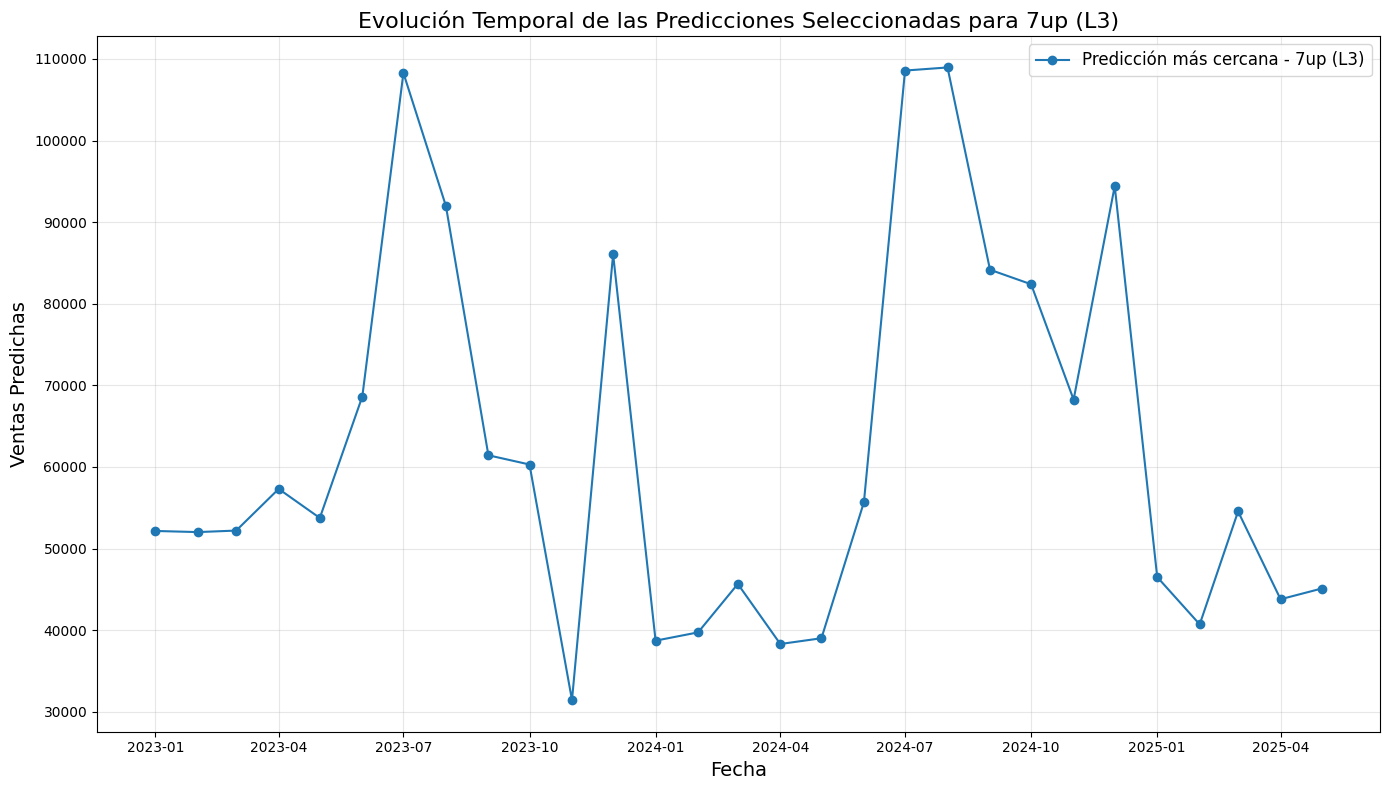

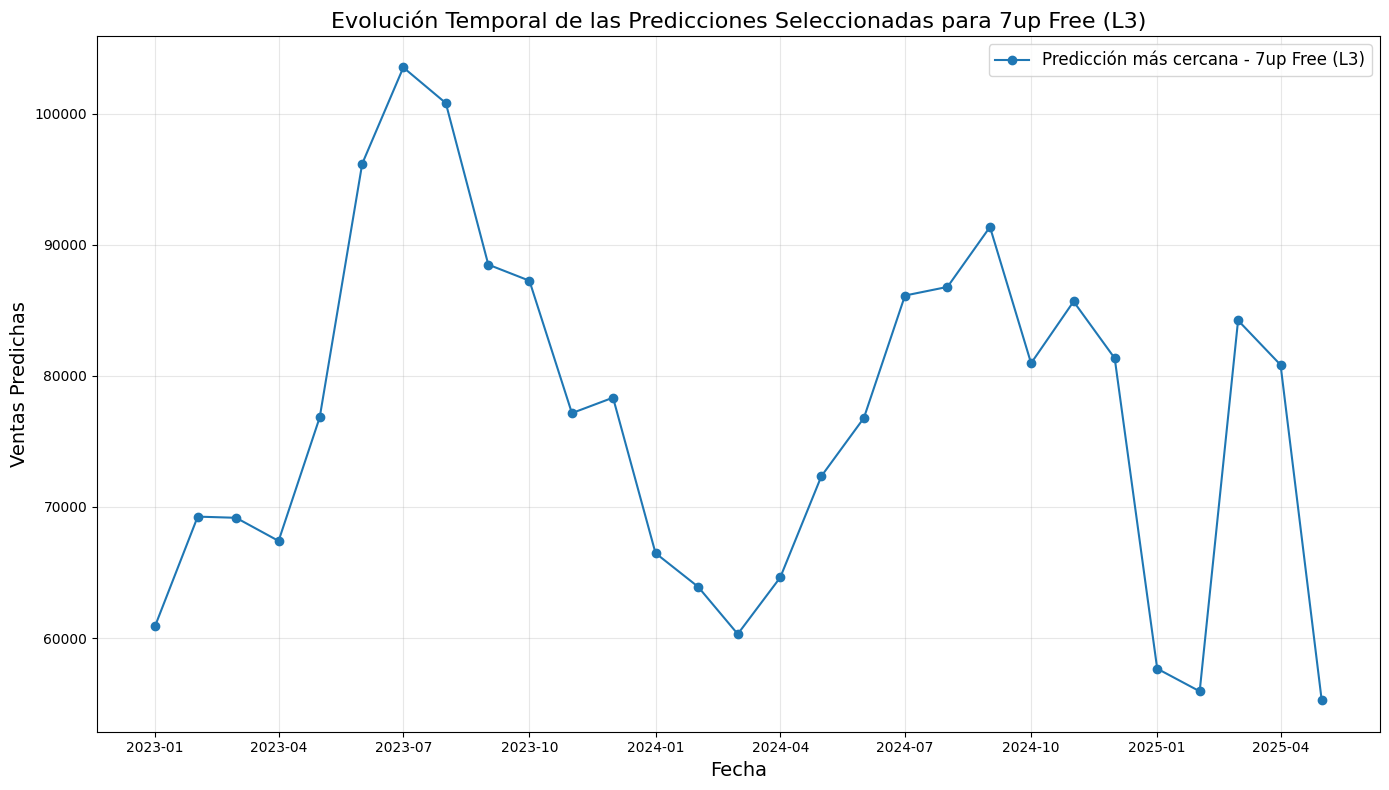

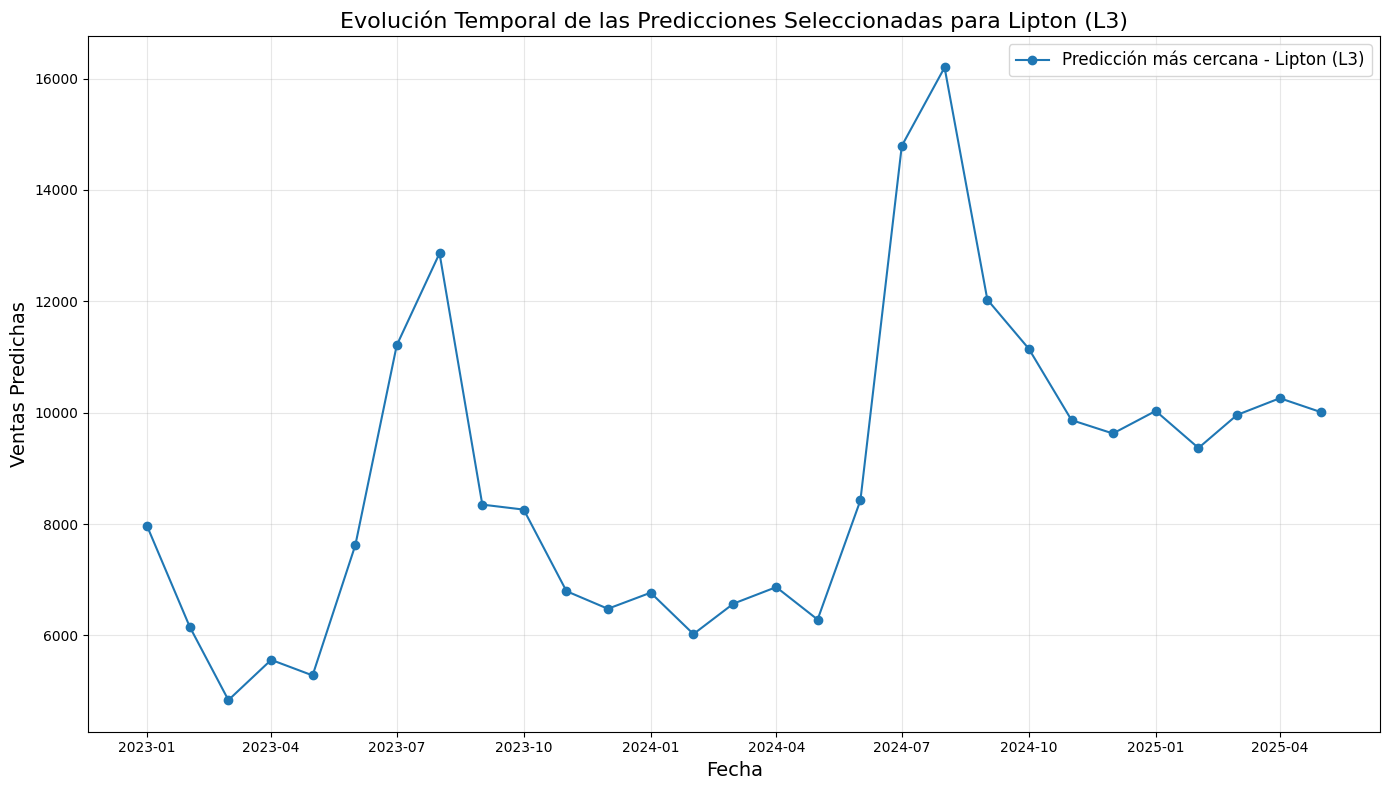

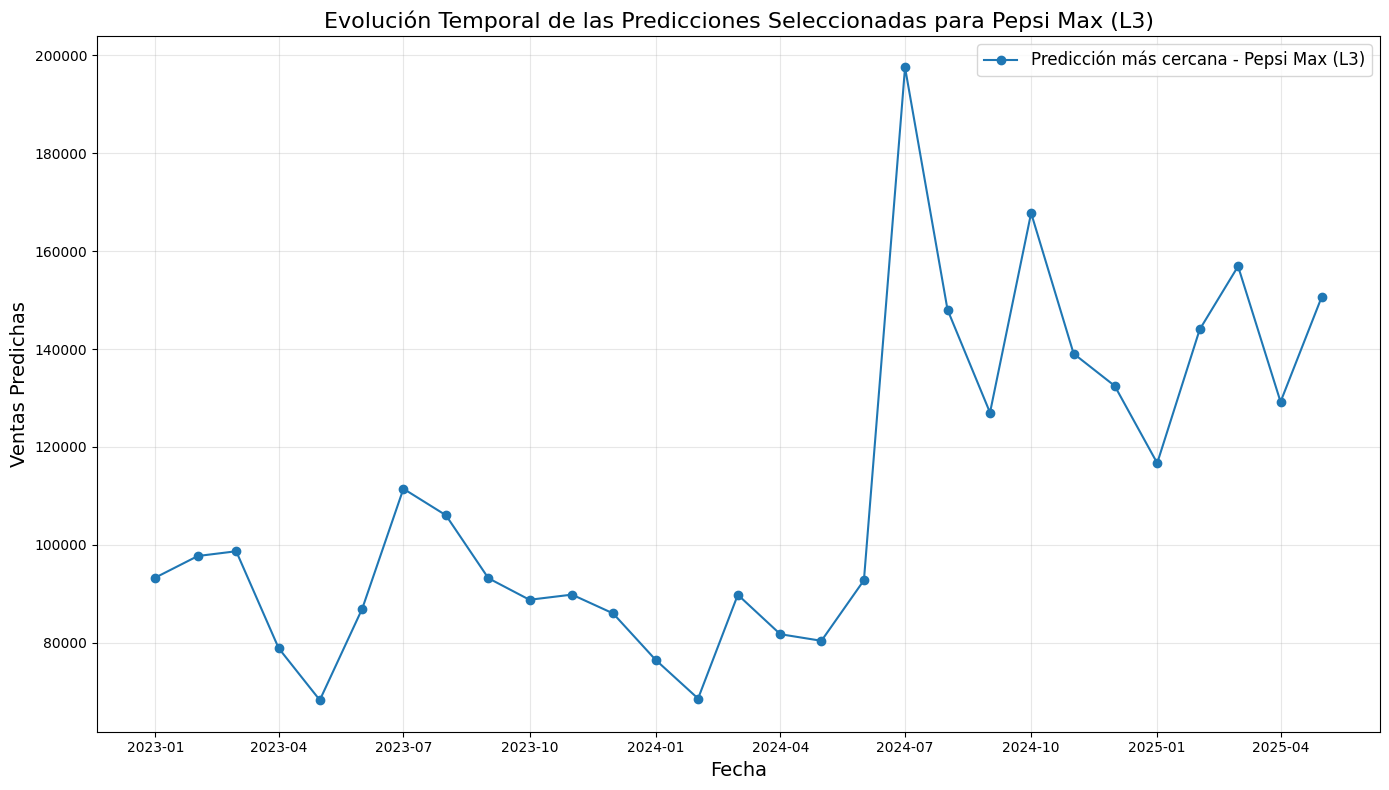

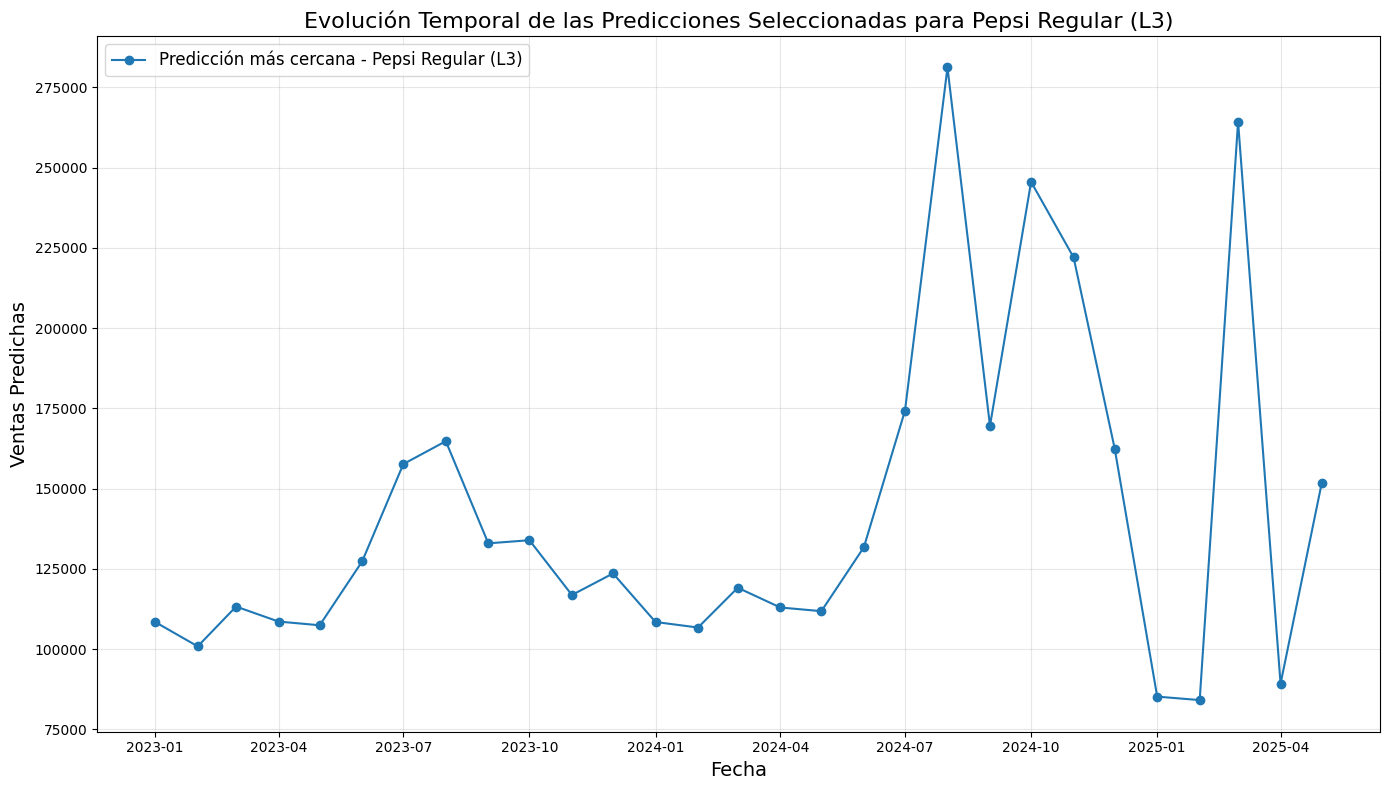

In [32]:
import matplotlib.pyplot as plt

# Crear una gráfica para cada producto en predicciones_optimas_totales_df
productos = predicciones_optimas_totales_df['SUBBRAND'].unique()

for producto in productos:
    # Filtrar las predicciones para el producto específico
    predicciones_producto = predicciones_optimas_totales_df[predicciones_optimas_totales_df['SUBBRAND'] == producto].copy()

    # Crear una nueva columna de fechas para graficar temporalmente
    predicciones_producto['Fecha'] = pd.to_datetime(
        predicciones_producto['YEAR'].astype(str) + '-' + predicciones_producto['MONTH'].astype(str),
        format='%Y-%m'
    )

    # Graficar las predicciones temporalmente para el producto
    plt.figure(figsize=(14, 8))
    plt.plot(predicciones_producto['Fecha'], predicciones_producto['AMOUNT'], marker='o', label=f'Predicción más cercana - {producto}')
    plt.title(f'Evolución Temporal de las Predicciones Seleccionadas para {producto}', fontsize=16)
    plt.xlabel('Fecha', fontsize=14)
    plt.ylabel('Ventas Predichas', fontsize=14)
    plt.grid(alpha=0.3)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()


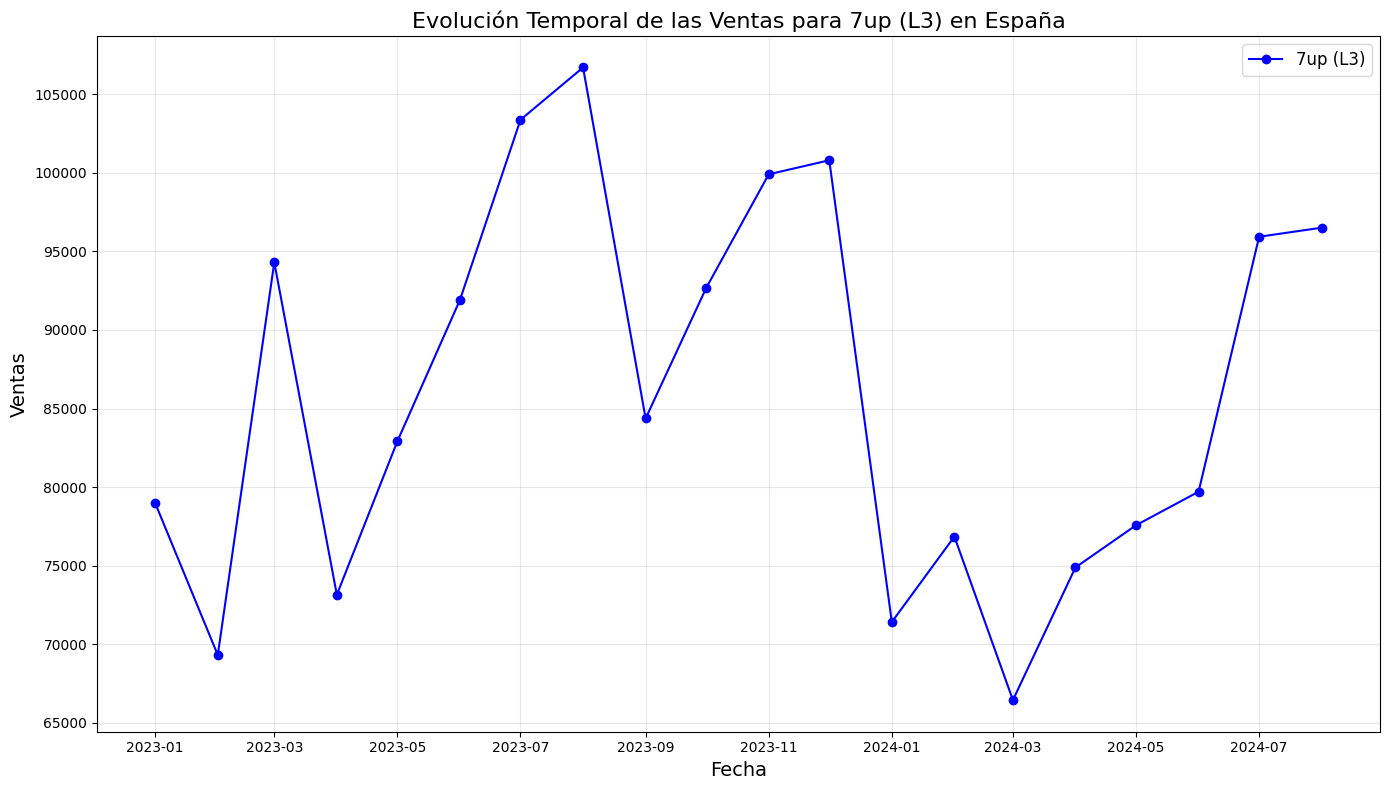

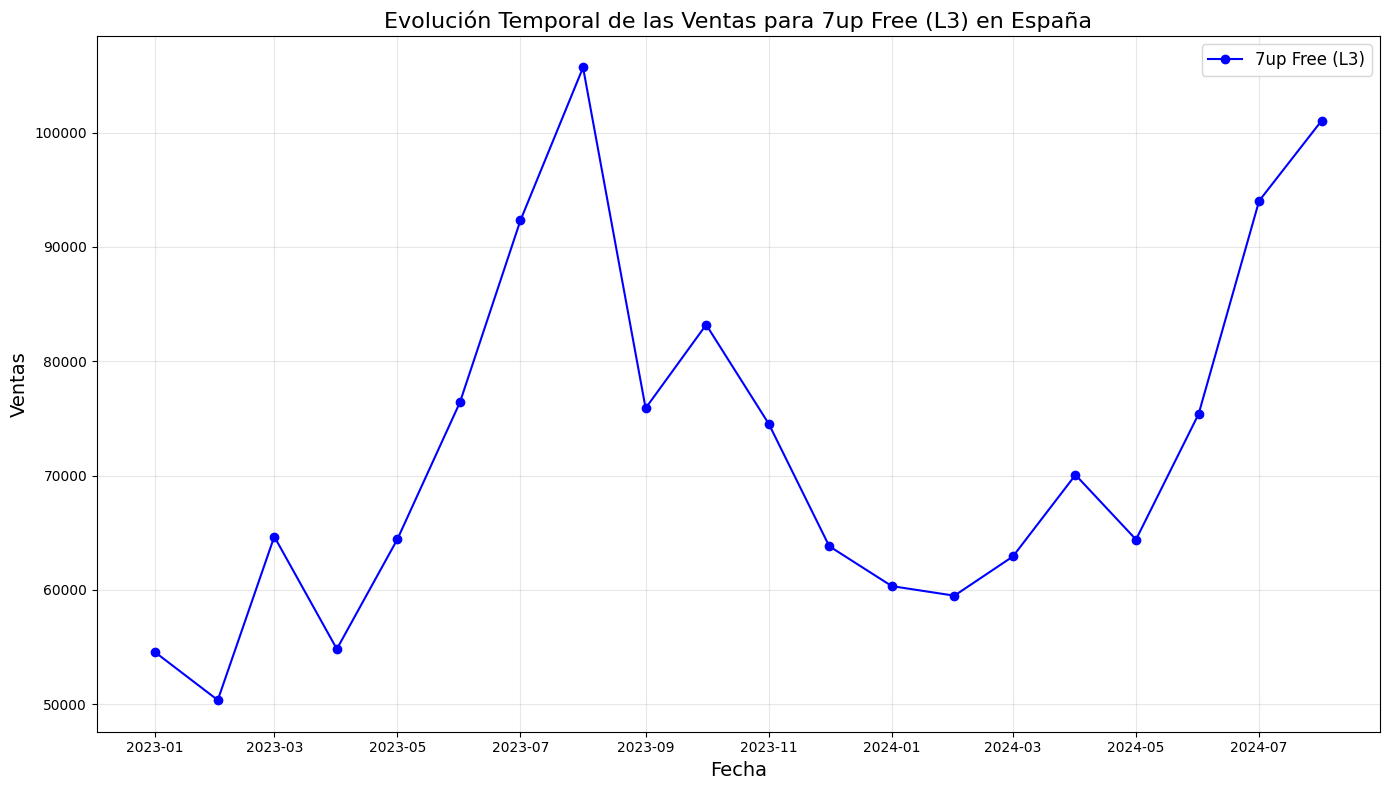

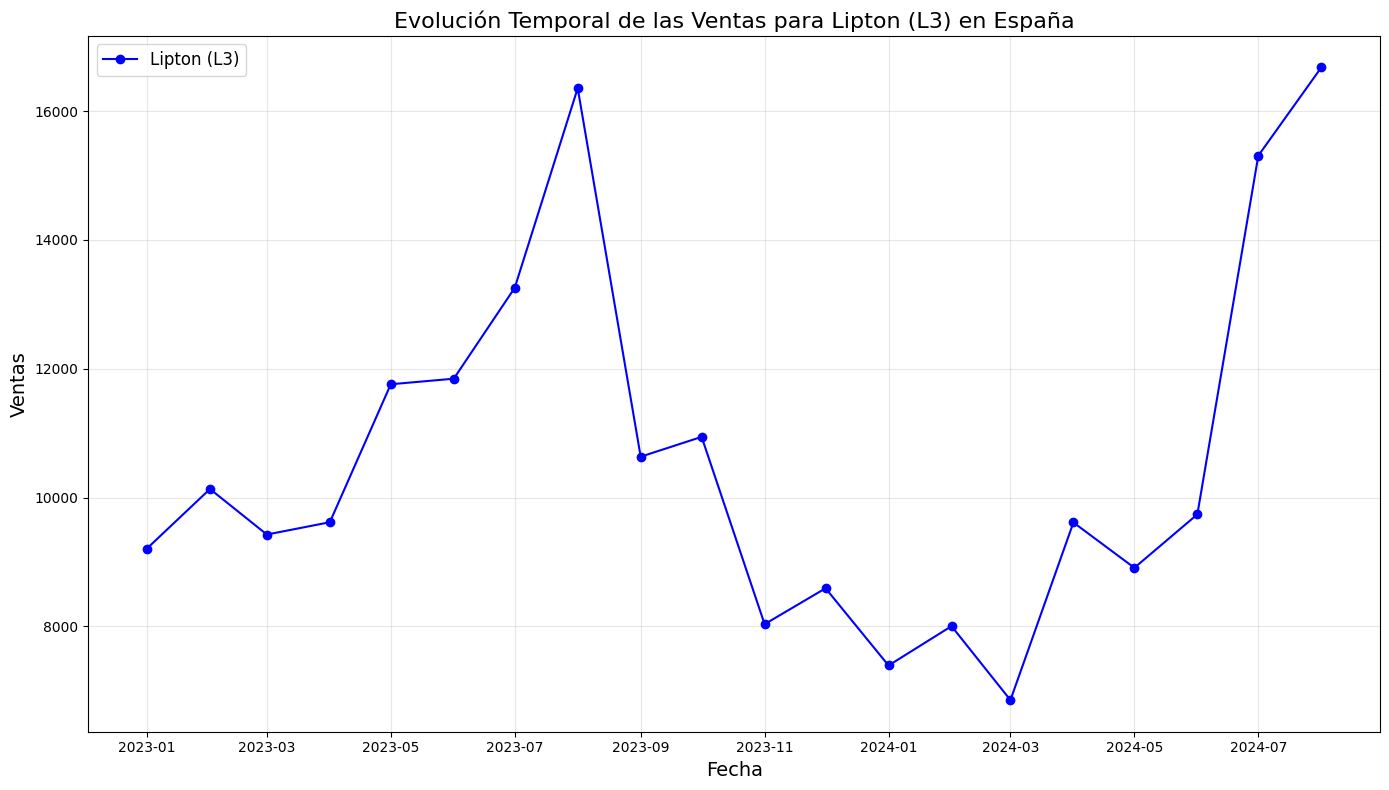

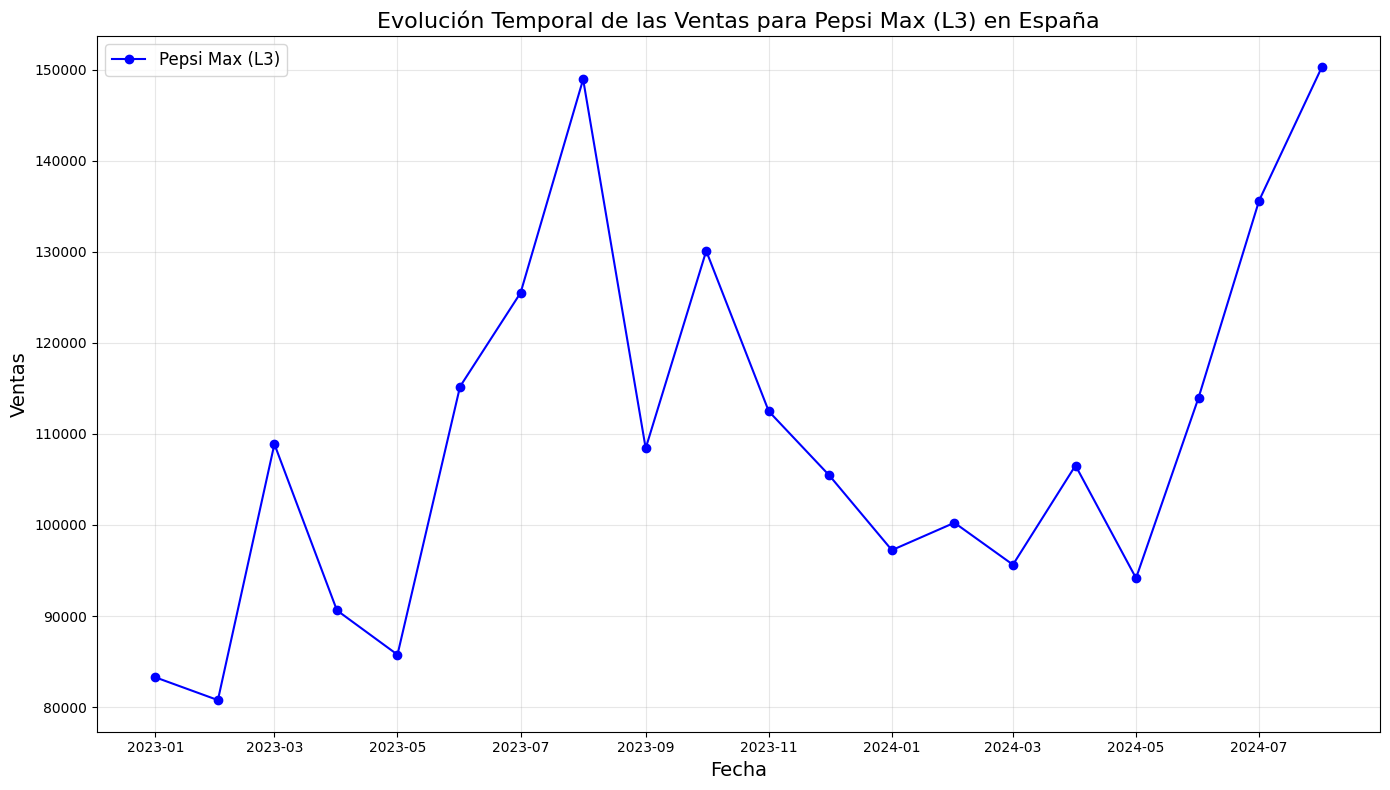

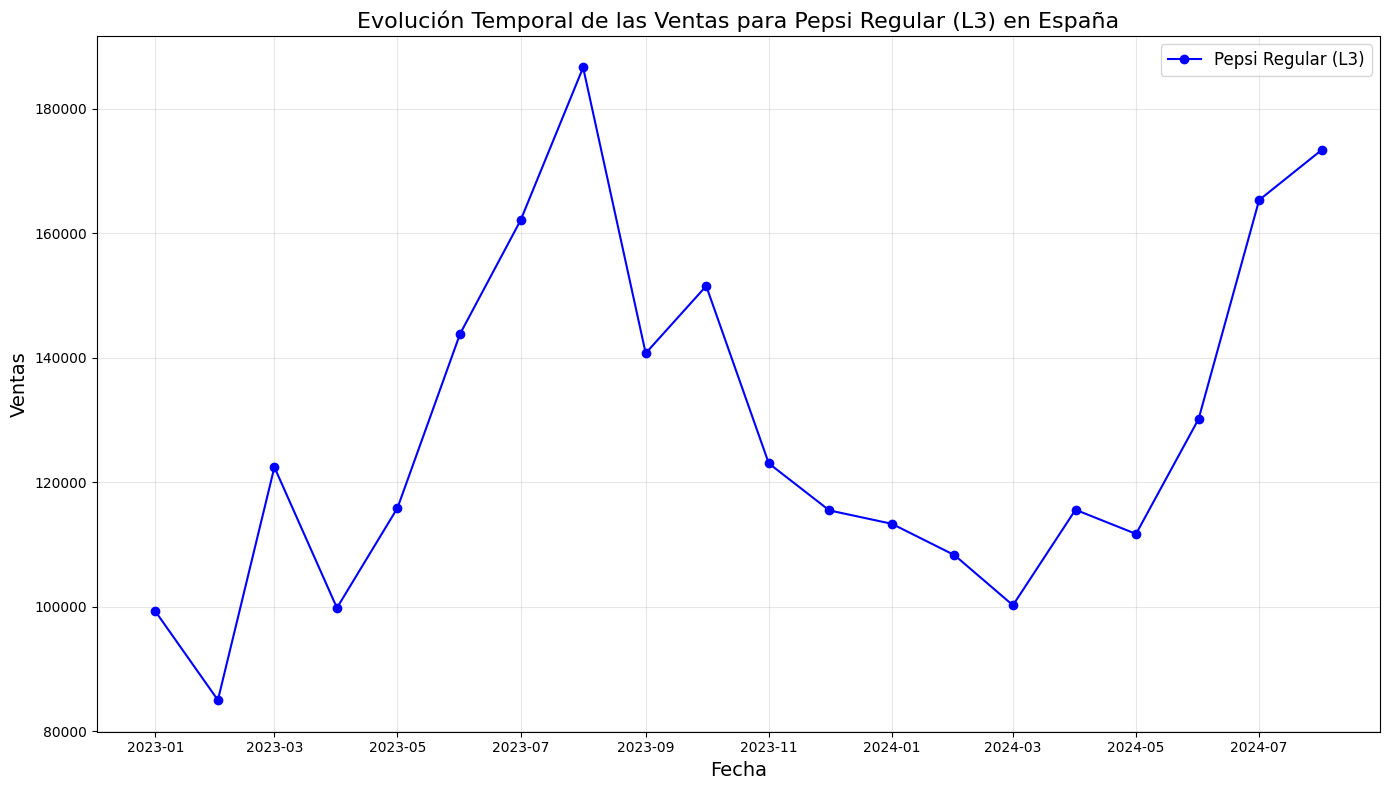

In [33]:
import matplotlib.pyplot as plt

# Filtrar los datos de España con las ventas reales (actuals)
ventas_espana = df[(df['COUNTRY'] == 'Spain') & (df['SCENARIO'] == 'actual')].copy()

# Crear una columna de fechas para representar temporalmente las ventas
ventas_espana['Fecha'] = pd.to_datetime(
    ventas_espana['YEAR'].astype(str) + '-' + ventas_espana['MONTH'].astype(str),
    format='%Y-%m'
)

# Sumar las ventas por producto y fecha
ventas_por_producto_fecha = ventas_espana.groupby(['SUBBRAND', 'Fecha'])['AMOUNT'].sum().reset_index()

# Obtener los productos únicos
productos = ventas_por_producto_fecha['SUBBRAND'].unique()

# Graficar las ventas de cada producto en España en gráficas separadas
for producto in productos:
    datos_producto = ventas_por_producto_fecha[ventas_por_producto_fecha['SUBBRAND'] == producto]
    plt.figure(figsize=(14, 8))
    plt.plot(datos_producto['Fecha'], datos_producto['AMOUNT'], marker='o', label=producto, color='blue')
    plt.title(f'Evolución Temporal de las Ventas para {producto} en España', fontsize=16)
    plt.xlabel('Fecha', fontsize=14)
    plt.ylabel('Ventas', fontsize=14)
    plt.grid(alpha=0.3)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()



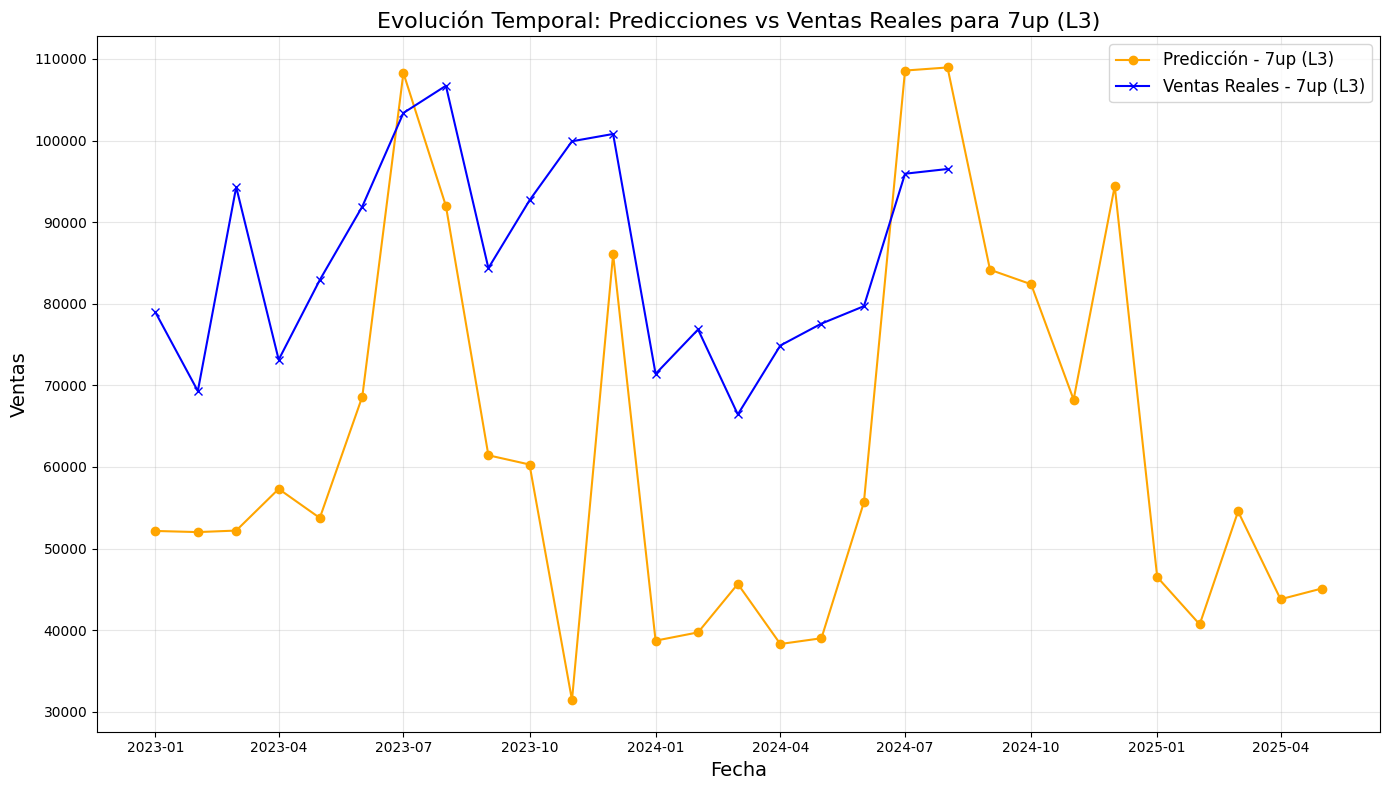

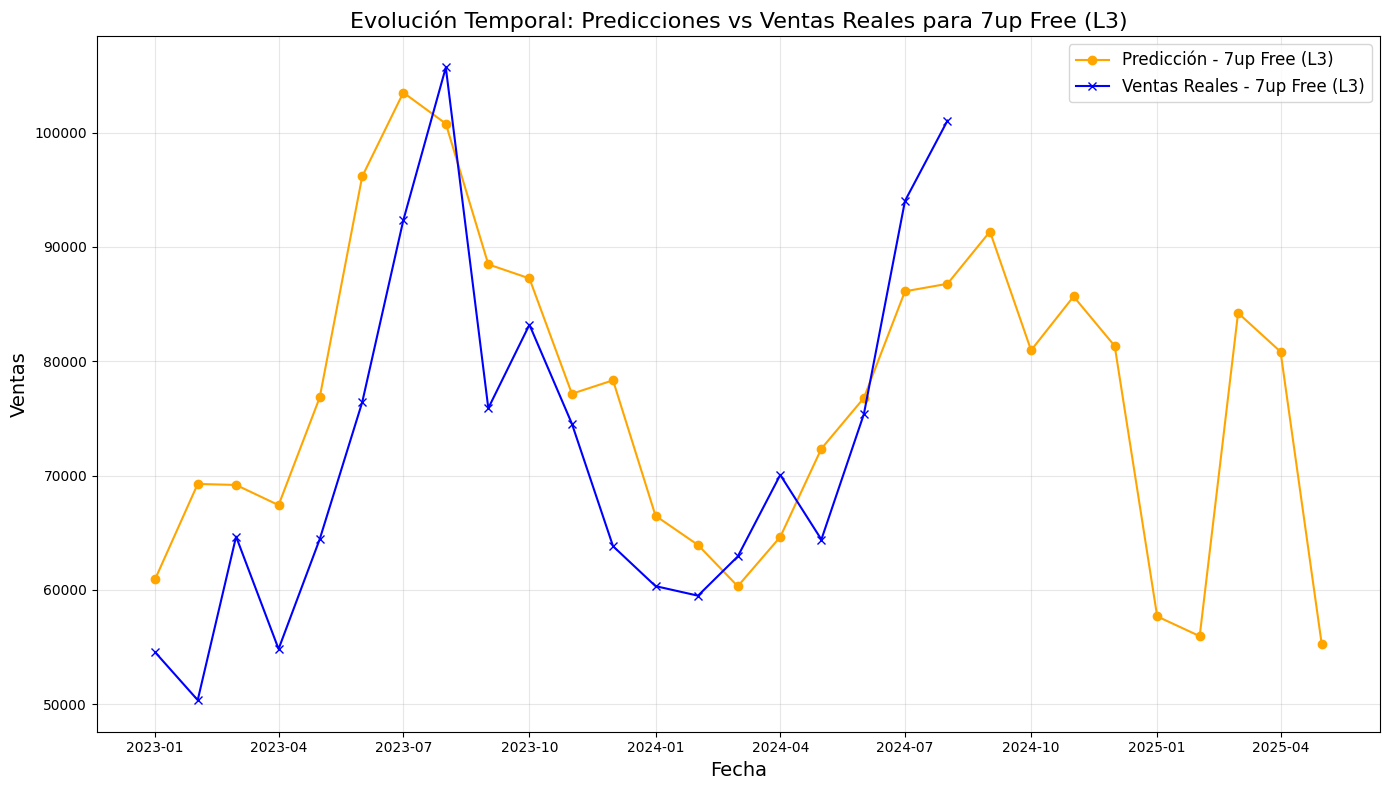

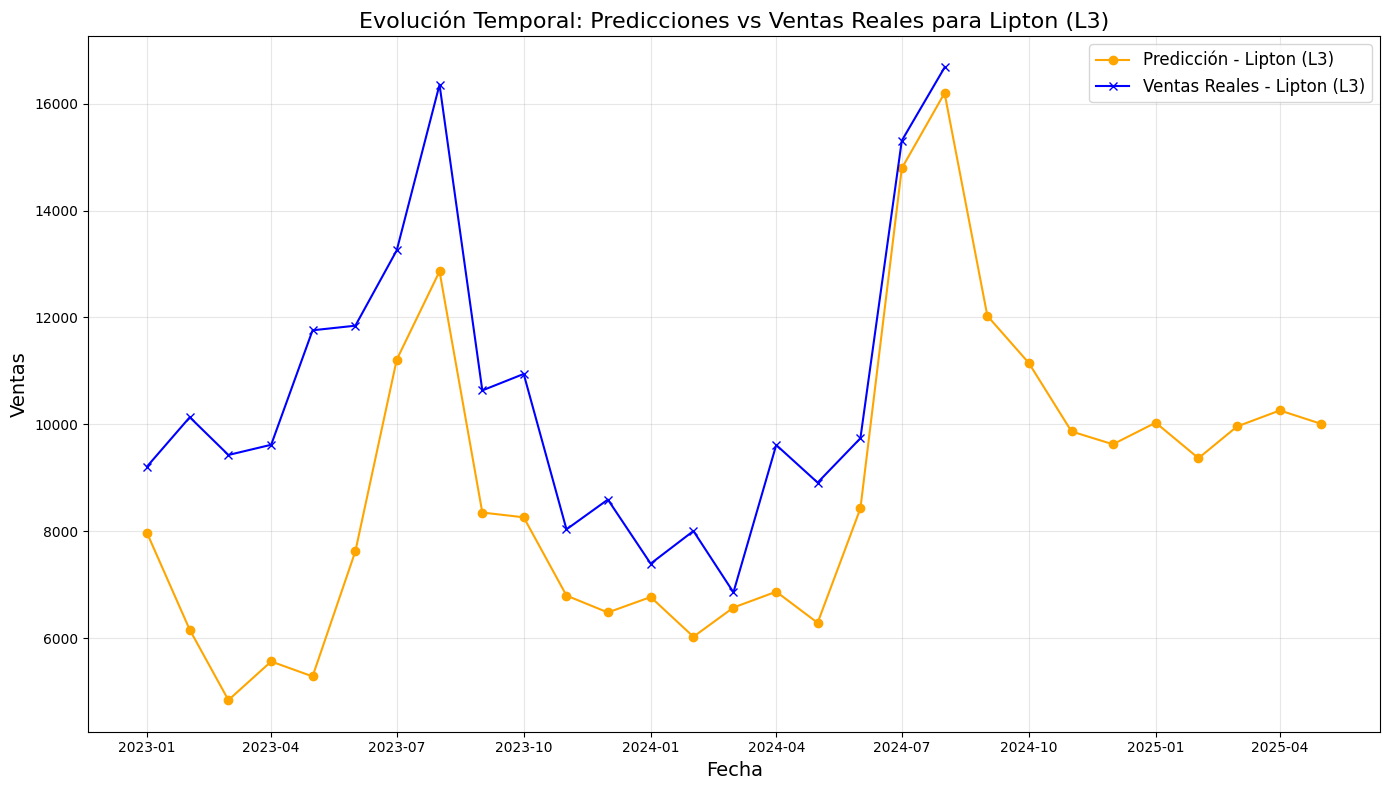

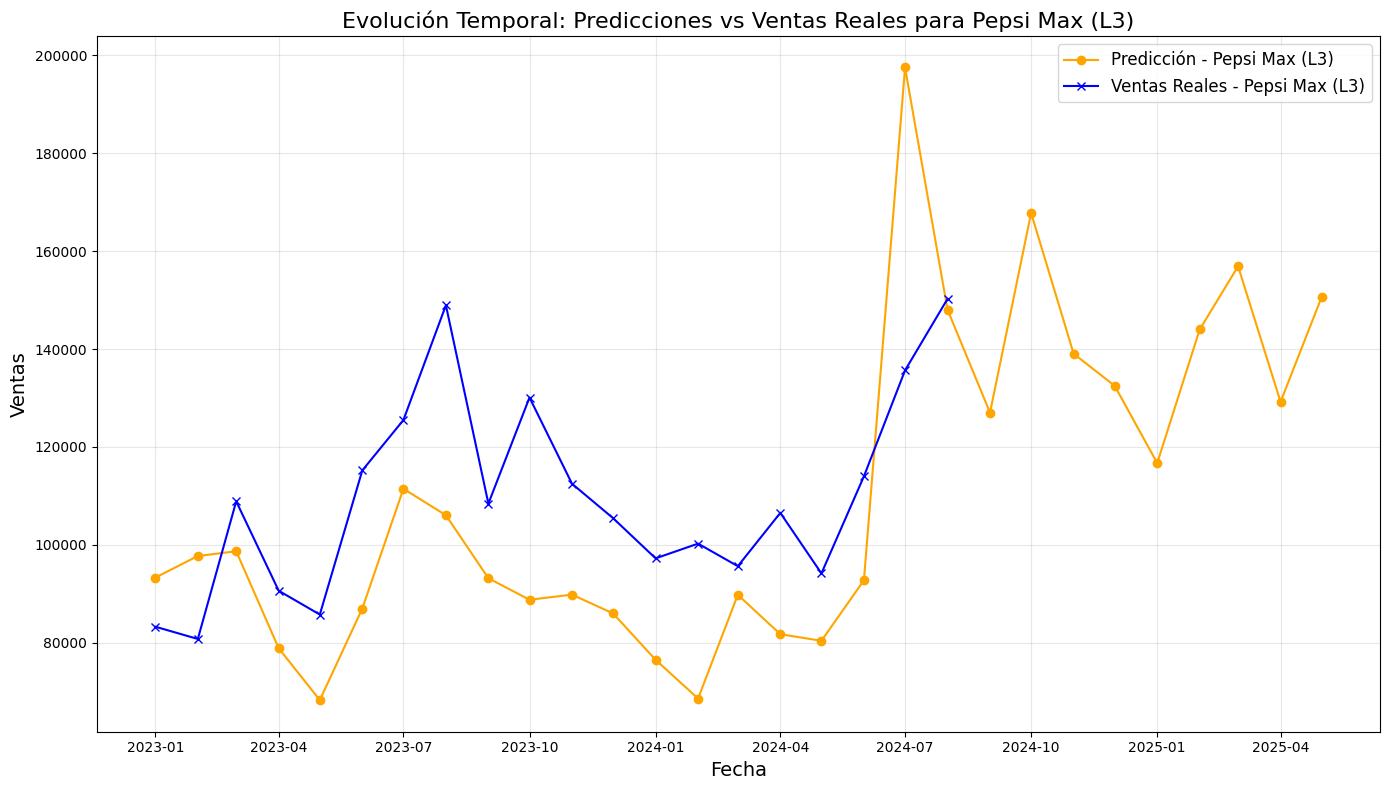

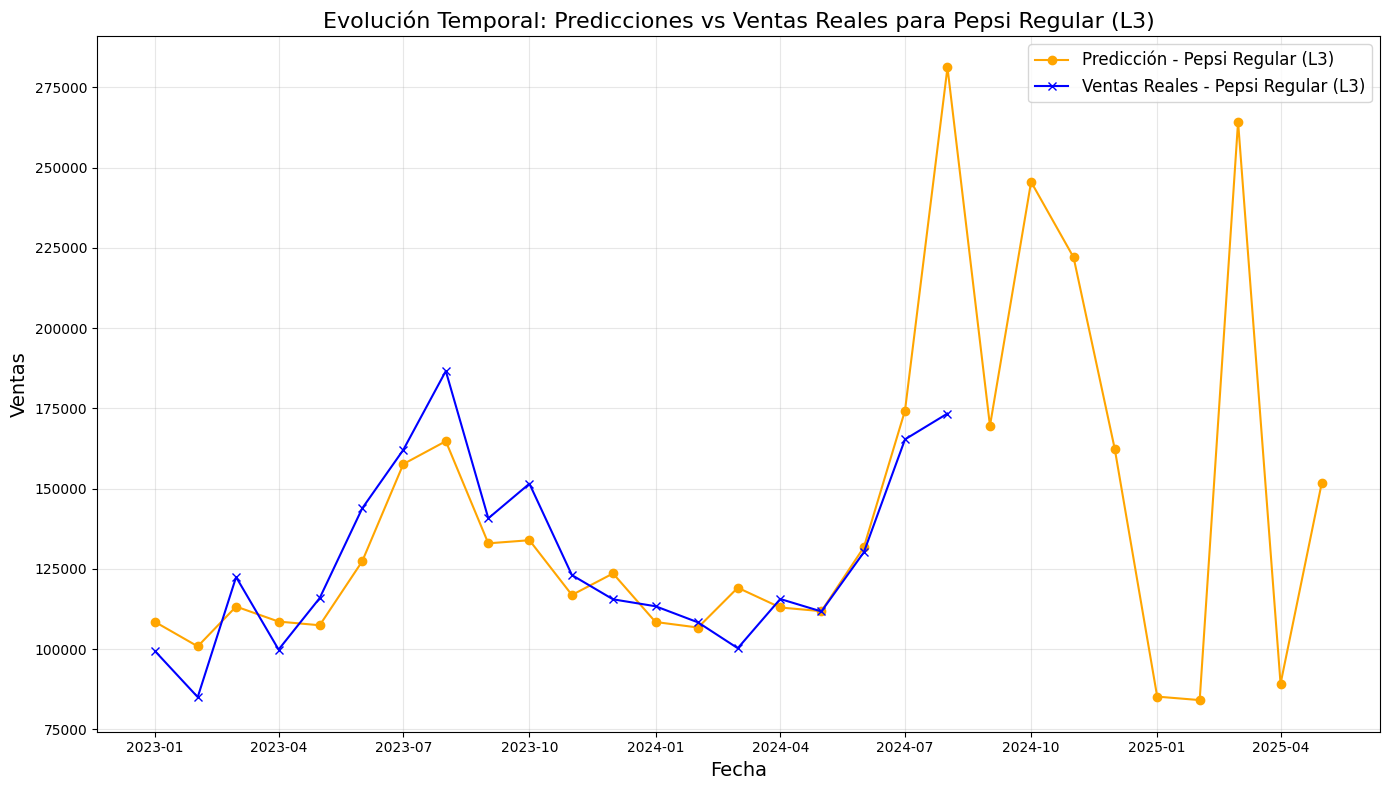

In [34]:
import matplotlib.pyplot as plt

# Crear listas únicas de productos en ambas datasets
productos_predicciones = predicciones_optimas_totales_df['SUBBRAND'].unique()
productos_actuals = ventas_por_producto_fecha['SUBBRAND'].unique()

# Iterar sobre los productos para graficar predicciones y ventas reales superpuestas
for producto in productos_predicciones:
    # Filtrar las predicciones para el producto específico
    predicciones_producto = predicciones_optimas_totales_df[predicciones_optimas_totales_df['SUBBRAND'] == producto].copy()
    predicciones_producto['Fecha'] = pd.to_datetime(
        predicciones_producto['YEAR'].astype(str) + '-' + predicciones_producto['MONTH'].astype(str),
        format='%Y-%m'
    )

    # Filtrar las ventas reales para el producto específico
    if producto in productos_actuals:
        actuals_producto = ventas_por_producto_fecha[ventas_por_producto_fecha['SUBBRAND'] == producto].copy()
    else:
        continue  # Si el producto no tiene ventas reales, pasa al siguiente

    # Crear la gráfica
    plt.figure(figsize=(14, 8))
    # Graficar predicciones
    plt.plot(predicciones_producto['Fecha'], predicciones_producto['AMOUNT'], marker='o', label=f'Predicción - {producto}', color='orange')
    # Graficar ventas reales
    plt.plot(actuals_producto['Fecha'], actuals_producto['AMOUNT'], marker='x', label=f'Ventas Reales - {producto}', color='blue')

    # Configuración del gráfico
    plt.title(f'Evolución Temporal: Predicciones vs Ventas Reales para {producto}', fontsize=16)
    plt.xlabel('Fecha', fontsize=14)
    plt.ylabel('Ventas', fontsize=14)
    plt.grid(alpha=0.3)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()



Hemos graficado la predicción mas cercana a la fecha predicha de cada producto vs las ventas reales de cada producto en españa.

Según el producto las predicciones son mejores o peores, por ejemplo para pepsi, las preducciones se asemejan mucho a los actuals, pero sin embargo para el 7 up la diferencia es mayor.